In [39]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [40]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
app_df = application_df.drop(columns=["EIN","NAME"])
app_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [41]:
# Determine the number of unique values in each column.
application_cat = app_df.dtypes[app_df.dtypes == "object"].index.tolist()

app_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [42]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = app_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

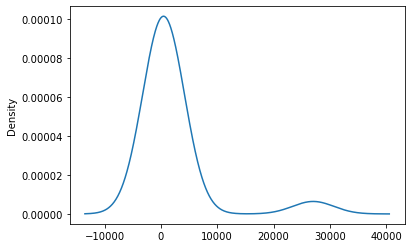

In [43]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [44]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 160].index)

# Replace in dataframe
for app in replace_application:
    app_df.APPLICATION_TYPE = app_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
app_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [45]:
# Look at USE_CASE value counts for binning
case_type_counts = app_df.USE_CASE.value_counts()
case_type_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

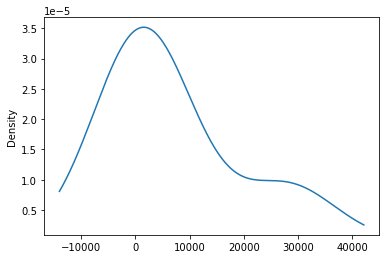

In [46]:
# Visualize the value counts
case_type_counts.plot.density()

In [47]:
# Look at ORGANIZATION value counts for binning
organization_type_counts = app_df.ORGANIZATION.value_counts()
organization_type_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

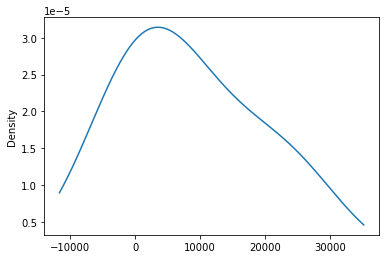

In [48]:
# Visualize the value counts
organization_type_counts.plot.density()

In [49]:
# Look at SPECIAL_CONSIDERATIONS value counts for binning
SPECIAL_CONSIDERATIONS_counts = app_df.SPECIAL_CONSIDERATIONS.value_counts()
SPECIAL_CONSIDERATIONS_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

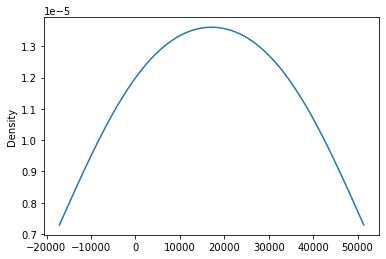

In [50]:
# Visualize the value counts
SPECIAL_CONSIDERATIONS_counts.plot.density()

In [51]:
# Look at CLASSIFICATION value counts for binning
classification_counts = app_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1248        1
C4120        1
C3700        1
C6100        1
C2561        1
Name: CLASSIFICATION, Length: 71, dtype: int64

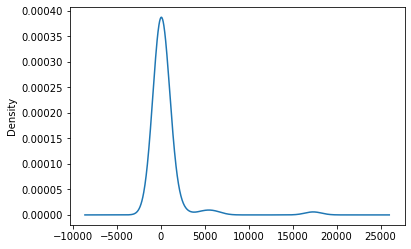

In [52]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [53]:
# Determine which values to replace if counts are less than 1882
replace_class = list(classification_counts[classification_counts < 1882].index)

# Replace in dataframe
for cls in replace_class:
    app_df.CLASSIFICATION = app_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
app_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

### Model Optimization Attempt 1

In [54]:
# Look at Income_Amt value counts for binning
INCOME_AMT_counts = app_df.INCOME_AMT.value_counts()
INCOME_AMT_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

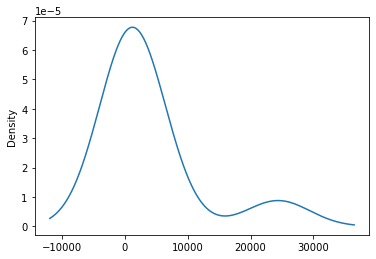

In [55]:
# Visualize the value counts of CLASSIFICATION
INCOME_AMT_counts.plot.density()

In [56]:
# Determine which values to replace if counts are less than 241
replace_amount = list(INCOME_AMT_counts[INCOME_AMT_counts < 241].index)

# Replace in dataframe
for app in replace_amount:
    app_df.INCOME_AMT = app_df.INCOME_AMT.replace(app,"5M+")
    
# Check to make sure binning was successful
app_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
5M+                564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [57]:
# Generate our categorical variable lists
application_cat = app_df.dtypes[app_df.dtypes == "object"].index.tolist()

In [58]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(app_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_5M+,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [59]:
# Merge one-hot encoded features and drop the originals
app_df = app_df.merge(encode_df,left_index=True, right_index=True)
app_df = app_df.drop(application_cat,1)
app_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_5M+,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [81]:
# Split our preprocessed data into our features and target arrays
y = app_df.IS_SUCCESSFUL
X = app_df.drop(columns="IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [82]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [83]:
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, kernel_initializer = "uniform", activation="relu", input_dim=41))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, kernel_initializer = "uniform", activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, kernel_initializer = "uniform", activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 80)                3360      
_________________________________________________________________
dense_24 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 31        
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Import checkpoint dependencies
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
checkpoint_path = "AlphabetSoupCharity_Optimized.h5"

In [85]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [86]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 0s - loss: 0.6934 - accuracy: 0.3438
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
 10/804 [..............................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5938
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
 20/804 [..............................] - ETA: 4s - loss: 0.6917 - accuracy: 0.6094
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
 32/804 [>.............................] - ETA: 3s - loss: 0.6892 - accuracy: 0.6494
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
 40/804 [>.............................] - ETA: 4s - loss: 0.6863 - accuracy: 0.6633
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
 

350/804 [============>.................] - ETA: 3s - loss: 0.5930 - accuracy: 0.7087
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
357/804 [============>.................] - ETA: 3s - loss: 0.5929 - accuracy: 0.7081
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
365/804 [============>.................] - ETA: 3s - loss: 0.5932 - accuracy: 0.7080
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
375/804 [============>.................] - ETA: 3s - loss: 0.5924 - accuracy: 0.7088
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
380/804 [=============>................] - ETA: 3s - loss: 0.5916 - accuracy: 0.7095
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
390/804 [=============>................] - ETA: 3s - loss: 0.5920 - accuracy

740/804 [==========================>...] - ETA: 0s - loss: 0.5762 - accuracy: 0.7190
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
750/804 [==========================>...] - ETA: 0s - loss: 0.5761 - accuracy: 0.7193
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
760/804 [===========================>..] - ETA: 0s - loss: 0.5758 - accuracy: 0.7196
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
772/804 [===========================>..] - ETA: 0s - loss: 0.5758 - accuracy: 0.7192
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5
780/804 [============================>.] - ETA: 0s - loss: 0.5756 - accuracy: 0.7194
Epoch 00001: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00001:

336/804 [===========>..................] - ETA: 2s - loss: 0.5532 - accuracy: 0.7339
Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5
346/804 [===========>..................] - ETA: 2s - loss: 0.5534 - accuracy: 0.7340
Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5
356/804 [============>.................] - ETA: 2s - loss: 0.5529 - accuracy: 0.7344
Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5
371/804 [============>.................] - ETA: 2s - loss: 0.5533 - accuracy: 0.7345
Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5
385/804 [=============>................] - ETA: 2s - loss: 0.5531 - accuracy: 0.7350
Epoch 00002:

736/804 [==========================>...] - ETA: 0s - loss: 0.5592 - accuracy: 0.7277
Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5
746/804 [==========================>...] - ETA: 0s - loss: 0.5593 - accuracy: 0.7275
Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5
761/804 [===========================>..] - ETA: 0s - loss: 0.5589 - accuracy: 0.7279
Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5
771/804 [===========================>..] - ETA: 0s - loss: 0.5591 - accuracy: 0.7275
Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00002: saving model to AlphabetSoupCharity_Optimized.h5
783/804 [============================>.] - ETA: 0s - loss: 0.5598 - accuracy: 0.7269
Epoch 00002:


Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5
327/804 [===========>..................] - ETA: 2s - loss: 0.5579 - accuracy: 0.7282
Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5
337/804 [===========>..................] - ETA: 2s - loss: 0.5577 - accuracy: 0.7287
Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5
347/804 [===========>..................] - ETA: 2s - loss: 0.5578 - accuracy: 0.7287
Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5
355/804 [============>.................] - ETA: 2s - loss: 0.5578 - accuracy: 0.7291
Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5
362/804 [============>.................] - ETA: 2s - loss: 0.5580 - accuracy: 0.7289
Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00003:

702/804 [=========================>....] - ETA: 0s - loss: 0.5551 - accuracy: 0.7292
Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5
713/804 [=========================>....] - ETA: 0s - loss: 0.5551 - accuracy: 0.7289
Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5
722/804 [=========================>....] - ETA: 0s - loss: 0.5549 - accuracy: 0.7290
Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5
733/804 [==========================>...] - ETA: 0s - loss: 0.5551 - accuracy: 0.7290
Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5
744/804 [==========================>...] - ETA: 0s - loss: 0.5550 - accuracy: 0.7288
Epoch 00003: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00003:


Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5
308/804 [==========>...................] - ETA: 2s - loss: 0.5520 - accuracy: 0.7304
Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5
318/804 [==========>...................] - ETA: 2s - loss: 0.5516 - accuracy: 0.7308
Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5
333/804 [===========>..................] - ETA: 2s - loss: 0.5520 - accuracy: 0.7309
Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5
346/804 [===========>..................] - ETA: 2s - loss: 0.5525 - accuracy: 0.7307
Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00004: saving model to Alph


Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5
708/804 [=========================>....] - ETA: 0s - loss: 0.5541 - accuracy: 0.7282
Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5
723/804 [=========================>....] - ETA: 0s - loss: 0.5548 - accuracy: 0.7278
Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5
737/804 [==========================>...] - ETA: 0s - loss: 0.5547 - accuracy: 0.7280
Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5
748/804 [==========================>...] - ETA: 0s - loss: 0.5547 - accuracy: 0.7280
Epoch 00004: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00004: saving model to Alph

316/804 [==========>...................] - ETA: 2s - loss: 0.5499 - accuracy: 0.7314
Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5
329/804 [===========>..................] - ETA: 2s - loss: 0.5500 - accuracy: 0.7318
Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5
344/804 [===========>..................] - ETA: 2s - loss: 0.5505 - accuracy: 0.7319
Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5
359/804 [============>.................] - ETA: 2s - loss: 0.5503 - accuracy: 0.7314
Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00005: saving model to Alph


Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5
739/804 [==========================>...] - ETA: 0s - loss: 0.5519 - accuracy: 0.7311
Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5
749/804 [==========================>...] - ETA: 0s - loss: 0.5520 - accuracy: 0.7310
Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5
763/804 [===========================>..] - ETA: 0s - loss: 0.5522 - accuracy: 0.7311
Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5
774/804 [===========================>..] - ETA: 0s - loss: 0.5524 - accuracy: 0.7307
Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00005: saving model to AlphabetSoupCharity_Optimized.h5
784/804 [=========================

310/804 [==========>...................] - ETA: 3s - loss: 0.5546 - accuracy: 0.7265
Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5
316/804 [==========>...................] - ETA: 3s - loss: 0.5554 - accuracy: 0.7263
Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5
320/804 [==========>...................] - ETA: 3s - loss: 0.5565 - accuracy: 0.7247
Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5
330/804 [===========>..................] - ETA: 3s - loss: 0.5564 - accuracy: 0.7248
Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5
345/804 [===========>..................] - ETA: 2s - loss: 0.5554 - accuracy: 0.7254
Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00006:


Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5
700/804 [=========================>....] - ETA: 0s - loss: 0.5523 - accuracy: 0.7277
Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5
710/804 [=========================>....] - ETA: 0s - loss: 0.5523 - accuracy: 0.7280
Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5
720/804 [=========================>....] - ETA: 0s - loss: 0.5519 - accuracy: 0.7285
Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5
727/804 [==========================>...] - ETA: 0s - loss: 0.5518 - accuracy: 0.7286
Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5
730/804 [==========================>...] - ETA: 0s - loss: 0.5523 - accuracy: 0.7283
Epoch 00006: saving model to AlphabetSoupCharity_Optimized.h5
735/804 [==========================>...] - ETA: 0s - loss: 0.5521 - accuracy

266/804 [========>.....................] - ETA: 2s - loss: 0.5523 - accuracy: 0.7286
Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5
281/804 [=========>....................] - ETA: 2s - loss: 0.5525 - accuracy: 0.7288
Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5
296/804 [==========>...................] - ETA: 2s - loss: 0.5546 - accuracy: 0.7266
Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5
310/804 [==========>...................] - ETA: 2s - loss: 0.5560 - accuracy: 0.7252
Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5
319/804 [==========>..............

681/804 [========================>.....] - ETA: 0s - loss: 0.5510 - accuracy: 0.7313
Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5
695/804 [========================>.....] - ETA: 0s - loss: 0.5514 - accuracy: 0.7306
Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5
706/804 [=========================>....] - ETA: 0s - loss: 0.5517 - accuracy: 0.7301
Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5
721/804 [=========================>....] - ETA: 0s - loss: 0.5510 - accuracy: 0.7304
Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00007: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00007: saving model to Alph

307/804 [==========>...................] - ETA: 2s - loss: 0.5575 - accuracy: 0.7253
Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5
322/804 [===========>..................] - ETA: 2s - loss: 0.5588 - accuracy: 0.7237
Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5
337/804 [===========>..................] - ETA: 1s - loss: 0.5577 - accuracy: 0.7244
Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5
352/804 [============>.................] - ETA: 1s - loss: 0.5575 - accuracy: 0.7243
Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to Alph

736/804 [==========================>...] - ETA: 0s - loss: 0.5522 - accuracy: 0.7283
Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5
747/804 [==========================>...] - ETA: 0s - loss: 0.5523 - accuracy: 0.7282
Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5
762/804 [===========================>..] - ETA: 0s - loss: 0.5515 - accuracy: 0.7292
Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5
776/804 [===========================>..] - ETA: 0s - loss: 0.5505 - accuracy: 0.7302
Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00008: saving model to Alph

343/804 [===========>..................] - ETA: 2s - loss: 0.5489 - accuracy: 0.7284
Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5
354/804 [============>.................] - ETA: 2s - loss: 0.5488 - accuracy: 0.7300
Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5
368/804 [============>.................] - ETA: 1s - loss: 0.5494 - accuracy: 0.7296
Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5
383/804 [=============>................] - ETA: 1s - loss: 0.5497 - accuracy: 0.7298
Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00009: saving model to Alph

772/804 [===========================>..] - ETA: 0s - loss: 0.5498 - accuracy: 0.7307
Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5
783/804 [============================>.] - ETA: 0s - loss: 0.5496 - accuracy: 0.7307
Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5
795/804 [============================>.] - ETA: 0s - loss: 0.5499 - accuracy: 0.7304
Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00009: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 4ms/step - loss: 0.5496 - accuracy: 0.7307
Epoch 10/100
  1/804 [..............................] - ETA: 0s - loss: 0.5361 - accuracy: 0.6875
Epoch 00010: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00010: saving model to AlphabetSoupCharity_Optimize


Epoch 00010: saving model to AlphabetSoupCharity_Optimized.h5
394/804 [=============>................] - ETA: 1s - loss: 0.5477 - accuracy: 0.7314
Epoch 00010: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00010: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00010: saving model to AlphabetSoupCharity_Optimized.h5
409/804 [==============>...............] - ETA: 1s - loss: 0.5483 - accuracy: 0.7304
Epoch 00010: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00010: saving model to AlphabetSoupCharity_Optimized.h5
422/804 [==============>...............] - ETA: 1s - loss: 0.5478 - accuracy: 0.7312
Epoch 00010: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00010: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00010: saving model to AlphabetSoupCharity_Optimized.h5
434/804 [===============>..............] - ETA: 1s - loss: 0.5474 - accuracy: 0.7321
Epoch 00010: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00010: saving model to Alph

Epoch 11/100
  1/804 [..............................] - ETA: 0s - loss: 0.6548 - accuracy: 0.5938
Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5
 14/804 [..............................] - ETA: 2s - loss: 0.5650 - accuracy: 0.7098
Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5
 25/804 [..............................] - ETA: 3s - loss: 0.5386 - accuracy: 0.7350
Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5
 40/804 [>.............................] - ETA: 3s - loss: 0.5502 - accuracy: 0.7281
Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving 

420/804 [==============>...............] - ETA: 1s - loss: 0.5509 - accuracy: 0.7304
Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5
435/804 [===============>..............] - ETA: 1s - loss: 0.5500 - accuracy: 0.7309
Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5
450/804 [===============>..............] - ETA: 1s - loss: 0.5504 - accuracy: 0.7303
Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5
463/804 [================>.............] - ETA: 1s - loss: 0.5502 - accuracy: 0.7304
Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00011: saving model to Alph


Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5
 31/804 [>.............................] - ETA: 4s - loss: 0.5609 - accuracy: 0.7107
Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5
 41/804 [>.............................] - ETA: 4s - loss: 0.5477 - accuracy: 0.7279
Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5
 51/804 [>.............................] - ETA: 4s - loss: 0.5481 - accuracy: 0.7261
Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5
 61/804 [=>............................] - ETA: 4s - loss: 0.5440 - accuracy: 0.7316
Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5
 71/804 [=>............................] - ETA: 4s - loss: 0.5519 - accuracy: 0.7245
Epoch 00012:

411/804 [==============>...............] - ETA: 2s - loss: 0.5500 - accuracy: 0.7284
Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5
421/804 [==============>...............] - ETA: 2s - loss: 0.5509 - accuracy: 0.7281
Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5
431/804 [===============>..............] - ETA: 2s - loss: 0.5520 - accuracy: 0.7270
Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5
441/804 [===============>..............] - ETA: 2s - loss: 0.5521 - accuracy: 0.7273
Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5
451/804 [===============>..............] - ETA: 2s - loss: 0.5519 - accuracy: 0.7278
Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00012:


Epoch 00012: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.5489 - accuracy: 0.7307
Epoch 13/100
  1/804 [..............................] - ETA: 0s - loss: 0.5477 - accuracy: 0.7500
Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5
 12/804 [..............................] - ETA: 3s - loss: 0.5620 - accuracy: 0.6927
Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5
 25/804 [..............................] - ETA: 3s - loss: 0.5644 - accuracy: 0.7088
Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5
 34/804 [>.............................] - ETA: 3s - loss: 0.5610 - accuracy: 0.7151
Epoch 00013: saving model to AlphabetSoupCharity_Optimize

397/804 [=============>................] - ETA: 2s - loss: 0.5471 - accuracy: 0.7315
Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5
411/804 [==============>...............] - ETA: 1s - loss: 0.5465 - accuracy: 0.7321
Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5
422/804 [==============>...............] - ETA: 1s - loss: 0.5453 - accuracy: 0.7326
Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5
437/804 [===============>..............] - ETA: 1s - loss: 0.5455 - accuracy: 0.7325
Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00013: saving model to AlphabetSoupCharity_Optimized.h5
447/804 [===============>.........

Epoch 14/100
  1/804 [..............................] - ETA: 0s - loss: 0.5861 - accuracy: 0.6875
Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5
 13/804 [..............................] - ETA: 3s - loss: 0.5742 - accuracy: 0.7284
Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5
 28/804 [>.............................] - ETA: 3s - loss: 0.5481 - accuracy: 0.7333
Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5
 43/804 [>.............................] - ETA: 3s - loss: 0.5402 - accuracy: 0.7384
Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00014: saving 


Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5
433/804 [===============>..............] - ETA: 1s - loss: 0.5481 - accuracy: 0.7310
Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5
446/804 [===============>..............] - ETA: 1s - loss: 0.5480 - accuracy: 0.7307
Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5
455/804 [===============>..............] - ETA: 1s - loss: 0.5482 - accuracy: 0.7306
Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5
468/804 [================>.............] - ETA: 1s - loss: 0.5478 - accuracy: 0.7310
Epoch 00014: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00014: saving model to Alph


Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5
 54/804 [=>............................] - ETA: 3s - loss: 0.5410 - accuracy: 0.7367
Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5
 64/804 [=>............................] - ETA: 3s - loss: 0.5405 - accuracy: 0.7358
Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5
 78/804 [=>............................] - ETA: 3s - loss: 0.5385 - accuracy: 0.7368
Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5
 89/804 [==>...........................] - ETA: 3s - loss: 0.5450 - accuracy: 0.7346
Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00015: saving model to Alph

429/804 [===============>..............] - ETA: 2s - loss: 0.5462 - accuracy: 0.7353
Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5
439/804 [===============>..............] - ETA: 2s - loss: 0.5458 - accuracy: 0.7355
Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5
449/804 [===============>..............] - ETA: 2s - loss: 0.5464 - accuracy: 0.7345
Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5
458/804 [================>.............] - ETA: 1s - loss: 0.5458 - accuracy: 0.7348
Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5
464/804 [================>.............] - ETA: 1s - loss: 0.5458 - accuracy: 0.7350
Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00015: saving model to AlphabetSoupCharity_Optimized.h5
474/804 [====

 15/804 [..............................] - ETA: 8s - loss: 0.5463 - accuracy: 0.7312 
Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5
 25/804 [..............................] - ETA: 7s - loss: 0.5455 - accuracy: 0.7350
Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5
 35/804 [>.............................] - ETA: 6s - loss: 0.5626 - accuracy: 0.7134
Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5
 45/804 [>.............................] - ETA: 6s - loss: 0.5619 - accuracy: 0.7104
Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5
 55/804 [=>............................] - ETA: 5s - loss: 0.5636 - accuracy: 0.7102
Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00016

425/804 [==============>...............] - ETA: 2s - loss: 0.5504 - accuracy: 0.7284
Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5
435/804 [===============>..............] - ETA: 1s - loss: 0.5500 - accuracy: 0.7287
Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5
450/804 [===============>..............] - ETA: 1s - loss: 0.5506 - accuracy: 0.7284
Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5
463/804 [================>.............] - ETA: 1s - loss: 0.5503 - accuracy: 0.7291
Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5
471/804 [================>.............] - ETA: 1s - loss: 0.5500 - accuracy: 0.7294
Epoch 00016:

790/804 [============================>.] - ETA: 0s - loss: 0.5474 - accuracy: 0.7315
Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5
798/804 [============================>.] - ETA: 0s - loss: 0.5473 - accuracy: 0.7316
Epoch 00016: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.5474 - accuracy: 0.7317
Epoch 17/100

Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5
  1/804 [..............................] - ETA: 0s - loss: 0.6519 - accuracy: 0.5938
Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5
 16/804 [..............................] - ETA: 3s - loss: 0.5521 - accuracy: 0.7422
Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00017: saving model to AlphabetSoupCharity_Optimize

411/804 [==============>...............] - ETA: 1s - loss: 0.5489 - accuracy: 0.7289
Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5
425/804 [==============>...............] - ETA: 1s - loss: 0.5493 - accuracy: 0.7290
Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5
436/804 [===============>..............] - ETA: 1s - loss: 0.5499 - accuracy: 0.7286
Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5
451/804 [===============>..............] - ETA: 1s - loss: 0.5495 - accuracy: 0.7290
Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00017: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00017: saving model to Alph

  7/804 [..............................] - ETA: 7s - loss: 0.5134 - accuracy: 0.7232
Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5
 17/804 [..............................] - ETA: 5s - loss: 0.5332 - accuracy: 0.7188
Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5
 27/804 [>.............................] - ETA: 5s - loss: 0.5364 - accuracy: 0.7338
Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5
 37/804 [>.............................] - ETA: 5s - loss: 0.5381 - accuracy: 0.7348
Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5
 47/804 [>.............................] - ETA: 5s - loss: 0.5503 - accuracy: 0.7281
Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5
 56/804 [=>..

397/804 [=============>................] - ETA: 2s - loss: 0.5548 - accuracy: 0.7258
Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5
407/804 [==============>...............] - ETA: 2s - loss: 0.5538 - accuracy: 0.7260
Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5
419/804 [==============>...............] - ETA: 2s - loss: 0.5523 - accuracy: 0.7273
Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5
431/804 [===============>..............] - ETA: 2s - loss: 0.5513 - accuracy: 0.7283
Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5
442/804 [===============>..............] - ETA: 2s - loss: 0.5518 - accuracy: 0.7284
Epoch 00018:


Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5
788/804 [============================>.] - ETA: 0s - loss: 0.5469 - accuracy: 0.7324
Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00018: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 5s 6ms/step - loss: 0.5469 - accuracy: 0.7325
Epoch 19/100
  1/804 [..............................] - ETA: 0s - loss: 0.6608 - accuracy: 0.6875
Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5
 13/804 [..............................] - ETA: 3s - loss: 0.5486 - accuracy: 0.7548
Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5
 24/804 [..............................] - ETA: 3s - loss: 0.5505 - accuracy: 0

355/804 [============>.................] - ETA: 3s - loss: 0.5459 - accuracy: 0.7327
Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5
363/804 [============>.................] - ETA: 2s - loss: 0.5464 - accuracy: 0.7321
Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5
373/804 [============>.................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7327
Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5
383/804 [=============>................] - ETA: 2s - loss: 0.5467 - accuracy: 0.7326
Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5
388/804 [=============>................] - ETA: 2s - loss: 0.5474 - accuracy: 0.7322
Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5
395/804 [=============>................] - ETA: 2s - loss: 0.5465 - accuracy

728/804 [==========================>...] - ETA: 0s - loss: 0.5472 - accuracy: 0.7321
Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5
737/804 [==========================>...] - ETA: 0s - loss: 0.5469 - accuracy: 0.7324
Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5
743/804 [==========================>...] - ETA: 0s - loss: 0.5471 - accuracy: 0.7323
Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5
758/804 [===========================>..] - ETA: 0s - loss: 0.5462 - accuracy: 0.7331
Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5
768/804 [===========================>..] - ETA: 0s - loss: 0.5467 - accuracy: 0.7328
Epoch 00019: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00019:

322/804 [===========>..................] - ETA: 2s - loss: 0.5488 - accuracy: 0.7291
Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5
329/804 [===========>..................] - ETA: 2s - loss: 0.5486 - accuracy: 0.7294
Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5
339/804 [===========>..................] - ETA: 2s - loss: 0.5485 - accuracy: 0.7294
Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5
349/804 [============>.................] - ETA: 2s - loss: 0.5482 - accuracy: 0.7295
Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5
364/804 [============>.................] - ETA: 2s - loss: 0.5484 - accuracy: 0.7294
Epoch 00020:

727/804 [==========================>...] - ETA: 0s - loss: 0.5473 - accuracy: 0.7323
Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5
739/804 [==========================>...] - ETA: 0s - loss: 0.5476 - accuracy: 0.7322
Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5
754/804 [===========================>..] - ETA: 0s - loss: 0.5472 - accuracy: 0.7321
Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5
764/804 [===========================>..] - ETA: 0s - loss: 0.5473 - accuracy: 0.7322
Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00020: saving model to AlphabetSoupCharity_Optimized.h5
774/804 [=========================

330/804 [===========>..................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7374
Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5
340/804 [===========>..................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7381
Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5
349/804 [============>.................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7367
Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5
357/804 [============>.................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7368
Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5
365/804 [============>.................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7376
Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5
375/804 [====

745/804 [==========================>...] - ETA: 0s - loss: 0.5460 - accuracy: 0.7331
Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5
755/804 [===========================>..] - ETA: 0s - loss: 0.5464 - accuracy: 0.7327
Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5
765/804 [===========================>..] - ETA: 0s - loss: 0.5469 - accuracy: 0.7325
Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5
780/804 [============================>.] - ETA: 0s - loss: 0.5462 - accuracy: 0.7332
Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00021: saving model to AlphabetSoupCharity_Optimized.h5
794/804 [============================>.] - ETA: 0s - loss: 0.5459 - accuracy: 0.7333
Epoch 00021:

353/804 [============>.................] - ETA: 2s - loss: 0.5464 - accuracy: 0.7326
Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5
361/804 [============>.................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7329
Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5
371/804 [============>.................] - ETA: 2s - loss: 0.5467 - accuracy: 0.7334
Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5
382/804 [=============>................] - ETA: 1s - loss: 0.5462 - accuracy: 0.7336
Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5
391/804 [=============>................] - ETA: 1s - loss: 0.5459 - accuracy: 0.7341
Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00022:

765/804 [===========================>..] - ETA: 0s - loss: 0.5459 - accuracy: 0.7328
Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5
773/804 [===========================>..] - ETA: 0s - loss: 0.5457 - accuracy: 0.7327
Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5
786/804 [============================>.] - ETA: 0s - loss: 0.5462 - accuracy: 0.7326
Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5
800/804 [============================>.] - ETA: 0s - loss: 0.5460 - accuracy: 0.7325
Epoch 00022: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5462 - accuracy: 0.7325
Epoch 23/100
  1/804 [..............................] - ETA: 0s - loss:

359/804 [============>.................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7348
Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5
371/804 [============>.................] - ETA: 2s - loss: 0.5471 - accuracy: 0.7342
Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5
382/804 [=============>................] - ETA: 2s - loss: 0.5471 - accuracy: 0.7347
Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5
392/804 [=============>................] - ETA: 2s - loss: 0.5476 - accuracy: 0.7341
Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5
402/804 [==============>...............] - ETA: 2s - loss: 0.5474 - accuracy: 0.7338
Epoch 00023:

763/804 [===========================>..] - ETA: 0s - loss: 0.5462 - accuracy: 0.7327
Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5
772/804 [===========================>..] - ETA: 0s - loss: 0.5461 - accuracy: 0.7326
Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5
782/804 [============================>.] - ETA: 0s - loss: 0.5461 - accuracy: 0.7329
Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5
792/804 [============================>.] - ETA: 0s - loss: 0.5464 - accuracy: 0.7329
Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00023: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5459 - accuracy: 0.7337
Epoch 24/100
  1/804 [..............................] - ETA: 0s - loss:


Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5
368/804 [============>.................] - ETA: 2s - loss: 0.5466 - accuracy: 0.7328
Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5
378/804 [=============>................] - ETA: 2s - loss: 0.5466 - accuracy: 0.7330
Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5
384/804 [=============>................] - ETA: 2s - loss: 0.5459 - accuracy: 0.7335
Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5
389/804 [=============>................] - ETA: 2s - loss: 0.5477 - accuracy: 0.7323
Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5
398/804 [=============>................] - ETA: 2s - loss: 0.5485 - accuracy: 0.7320
Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00024:


Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5
758/804 [===========================>..] - ETA: 0s - loss: 0.5463 - accuracy: 0.7322
Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5
768/804 [===========================>..] - ETA: 0s - loss: 0.5464 - accuracy: 0.7323
Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5
783/804 [============================>.] - ETA: 0s - loss: 0.5466 - accuracy: 0.7322
Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5
795/804 [============================>.] - ETA: 0s - loss: 0.5460 - accuracy: 0.7327
Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00024: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [=========================

360/804 [============>.................] - ETA: 2s - loss: 0.5534 - accuracy: 0.7240
Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5
369/804 [============>.................] - ETA: 2s - loss: 0.5532 - accuracy: 0.7241
Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5
384/804 [=============>................] - ETA: 2s - loss: 0.5529 - accuracy: 0.7250
Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5
397/804 [=============>................] - ETA: 2s - loss: 0.5517 - accuracy: 0.7258
Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5
409/804 [==============>..........

774/804 [===========================>..] - ETA: 0s - loss: 0.5458 - accuracy: 0.7332
Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5
784/804 [============================>.] - ETA: 0s - loss: 0.5455 - accuracy: 0.7333
Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5
794/804 [============================>.] - ETA: 0s - loss: 0.5456 - accuracy: 0.7334
Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00025: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5454 - accuracy: 0.7336
Epoch 26/100
  1/804 [..............................] - ETA: 0s - loss: 0.4770 - accuracy: 0.7812
Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5
 10/804 [..............................] - ETA: 7s - loss:

361/804 [============>.................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7369
Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5
370/804 [============>.................] - ETA: 2s - loss: 0.5444 - accuracy: 0.7353
Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5
380/804 [=============>................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7350
Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5
390/804 [=============>................] - ETA: 2s - loss: 0.5447 - accuracy: 0.7347
Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5
401/804 [=============>................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7346
Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00026:

760/804 [===========================>..] - ETA: 0s - loss: 0.5467 - accuracy: 0.7330
Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5
770/804 [===========================>..] - ETA: 0s - loss: 0.5465 - accuracy: 0.7332
Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5
783/804 [============================>.] - ETA: 0s - loss: 0.5460 - accuracy: 0.7336
Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5
795/804 [============================>.] - ETA: 0s - loss: 0.5456 - accuracy: 0.7337
Epoch 00026: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5455 - accuracy: 0.7336
Epoch 27/100

Epoch 00027: saving model to AlphabetSoupCharity_Optimize

Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5
372/804 [============>.................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7337
Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5
381/804 [=============>................] - ETA: 1s - loss: 0.5448 - accuracy: 0.7329
Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5
396/804 [=============>................] - ETA: 1s - loss: 0.5443 - accuracy: 0.7337
Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5
411/804 [==============>...............] - ETA: 1s - loss: 0.5443 - accuracy: 0.7338
Epoch 00027: saving model to Alpha

784/804 [============================>.] - ETA: 0s - loss: 0.5458 - accuracy: 0.7327
Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5
795/804 [============================>.] - ETA: 0s - loss: 0.5455 - accuracy: 0.7331
Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00027: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5449 - accuracy: 0.7335
Epoch 28/100
  1/804 [..............................] - ETA: 0s - loss: 0.5174 - accuracy: 0.7812
Epoch 00028: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00028: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00028: saving model to AlphabetSoupCharity_Optimized.h5
 12/804 [..............................] - ETA: 4s - loss: 0.5506 - accuracy: 0.7161
Epoch 00028: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00028: saving model to AlphabetSoupCharity_Optimize

387/804 [=============>................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7339
Epoch 00028: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00028: saving model to AlphabetSoupCharity_Optimized.h5
397/804 [=============>................] - ETA: 1s - loss: 0.5441 - accuracy: 0.7342
Epoch 00028: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00028: saving model to AlphabetSoupCharity_Optimized.h5
408/804 [==============>...............] - ETA: 1s - loss: 0.5441 - accuracy: 0.7346
Epoch 00028: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00028: saving model to AlphabetSoupCharity_Optimized.h5
417/804 [==============>...............] - ETA: 1s - loss: 0.5437 - accuracy: 0.7352
Epoch 00028: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00028: saving model to AlphabetSoupCharity_Optimized.h5
427/804 [==============>...............] - ETA: 1s - loss: 0.5429 - accuracy: 0.7357
Epoch 00028: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00028:

804/804 [==============================] - 4s 5ms/step - loss: 0.5447 - accuracy: 0.7338
Epoch 29/100
  1/804 [..............................] - ETA: 0s - loss: 0.4701 - accuracy: 0.7812
Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5
 13/804 [..............................] - ETA: 3s - loss: 0.5050 - accuracy: 0.7692
Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5
 26/804 [..............................] - ETA: 3s - loss: 0.5287 - accuracy: 0.7452
Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5
 34/804 [>.............................] - ETA: 3s - loss: 0.5287 - accuracy: 0.7454
Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00029: saving model to AlphabetSoupCharity_Optimize

398/804 [=============>................] - ETA: 2s - loss: 0.5480 - accuracy: 0.7315
Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5
409/804 [==============>...............] - ETA: 1s - loss: 0.5471 - accuracy: 0.7324
Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5
422/804 [==============>...............] - ETA: 1s - loss: 0.5480 - accuracy: 0.7313
Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5
433/804 [===============>..............] - ETA: 1s - loss: 0.5481 - accuracy: 0.7315
Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5
443/804 [===============>..............] - ETA: 1s - loss: 0.5471 - accuracy: 0.7327
Epoch 00029:


Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5
788/804 [============================>.] - ETA: 0s - loss: 0.5442 - accuracy: 0.7342
Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5
795/804 [============================>.] - ETA: 0s - loss: 0.5444 - accuracy: 0.7338
Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00029: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5445 - accuracy: 0.7336
Epoch 30/100
  1/804 [..............................] - ETA: 0s - loss: 0.5658 - accuracy: 0.7188
Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5
 12/804 [..............................] - ETA: 3s - loss: 0.5567 - accuracy: 0.7057
Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00030: saving model to AlphabetSoupCharity_Optimize

384/804 [=============>................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7352
Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5
394/804 [=============>................] - ETA: 2s - loss: 0.5421 - accuracy: 0.7347
Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5
404/804 [==============>...............] - ETA: 2s - loss: 0.5430 - accuracy: 0.7341
Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5
414/804 [==============>...............] - ETA: 1s - loss: 0.5445 - accuracy: 0.7332
Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5
424/804 [==============>...............] - ETA: 1s - loss: 0.5435 - accuracy: 0.7336
Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00030:

790/804 [============================>.] - ETA: 0s - loss: 0.5447 - accuracy: 0.7341
Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5
803/804 [============================>.] - ETA: 0s - loss: 0.5447 - accuracy: 0.7338
Epoch 00030: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5447 - accuracy: 0.7339
Epoch 31/100
  1/804 [..............................] - ETA: 0s - loss: 0.6126 - accuracy: 0.6250
Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5
 10/804 [..............................] - ETA: 4s - loss: 0.5753 - accuracy: 0.6938
Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5
 24/804 [..............................] - ETA: 3s - loss: 0.5573 - accuracy: 0.6992
Epoch 00031: saving model to Alphabe

382/804 [=============>................] - ETA: 2s - loss: 0.5481 - accuracy: 0.7319
Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5
393/804 [=============>................] - ETA: 2s - loss: 0.5476 - accuracy: 0.7323
Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5
405/804 [==============>...............] - ETA: 2s - loss: 0.5466 - accuracy: 0.7328
Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5
420/804 [==============>...............] - ETA: 1s - loss: 0.5463 - accuracy: 0.7332
Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5
433/804 [===============>.........

788/804 [============================>.] - ETA: 0s - loss: 0.5452 - accuracy: 0.7341
Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00031: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5445 - accuracy: 0.7347
Epoch 32/100

Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5
  1/804 [..............................] - ETA: 0s - loss: 0.3773 - accuracy: 0.8750
Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5
 16/804 [..............................] - ETA: 2s - loss: 0.5561 - accuracy: 0.7227
Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5
 26/804 [..............................] - ETA: 3s - loss: 0.5434 - accuracy: 0

395/804 [=============>................] - ETA: 1s - loss: 0.5493 - accuracy: 0.7305
Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5
406/804 [==============>...............] - ETA: 1s - loss: 0.5491 - accuracy: 0.7304
Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5
421/804 [==============>...............] - ETA: 1s - loss: 0.5477 - accuracy: 0.7316
Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5
436/804 [===============>..............] - ETA: 1s - loss: 0.5485 - accuracy: 0.7312
Epoch 00032: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00032: saving model to Alph

Epoch 33/100
  1/804 [..............................] - ETA: 0s - loss: 0.5063 - accuracy: 0.8125
Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5
 12/804 [..............................] - ETA: 3s - loss: 0.5308 - accuracy: 0.7448
Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5
 26/804 [..............................] - ETA: 3s - loss: 0.5223 - accuracy: 0.7512
Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5
 37/804 [>.............................] - ETA: 3s - loss: 0.5308 - accuracy: 0.7416
Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5
 51/804 [>...........


Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5
427/804 [==============>...............] - ETA: 1s - loss: 0.5383 - accuracy: 0.7387
Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5
437/804 [===============>..............] - ETA: 1s - loss: 0.5377 - accuracy: 0.7384
Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5
451/804 [===============>..............] - ETA: 1s - loss: 0.5383 - accuracy: 0.7377
Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5
462/804 [================>.............] - ETA: 1s - loss: 0.5401 - accuracy: 0.7366
Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00033: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00033: saving model to Alph


Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5
 28/804 [>.............................] - ETA: 4s - loss: 0.5473 - accuracy: 0.7277
Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5
 38/804 [>.............................] - ETA: 4s - loss: 0.5485 - accuracy: 0.7262
Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5
 48/804 [>.............................] - ETA: 4s - loss: 0.5560 - accuracy: 0.7227
Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5
 59/804 [=>............................] - ETA: 3s - loss: 0.5577 - accuracy: 0.7225
Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5
 73/804 [=>.......................

437/804 [===============>..............] - ETA: 1s - loss: 0.5413 - accuracy: 0.7363
Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5
443/804 [===============>..............] - ETA: 1s - loss: 0.5411 - accuracy: 0.7368
Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5
455/804 [===============>..............] - ETA: 1s - loss: 0.5405 - accuracy: 0.7372
Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5
468/804 [================>.............] - ETA: 1s - loss: 0.5406 - accuracy: 0.7370
Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00034: saving model to AlphabetSoupCharity_Optimized.h5
479/804 [================>.............] - ETA: 1s - loss: 0.5407 - accuracy: 0.7368
Epoch 00034:

 16/804 [..............................] - ETA: 9s - loss: 0.5132 - accuracy: 0.7559 
Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5
 24/804 [..............................] - ETA: 8s - loss: 0.5036 - accuracy: 0.7656
Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5
 34/804 [>.............................] - ETA: 7s - loss: 0.5204 - accuracy: 0.7528
Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5
 44/804 [>.............................] - ETA: 6s - loss: 0.5275 - accuracy: 0.7514
Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5
 54/804 [=>............................] - ETA: 5s - loss: 0.5376 - accuracy: 0.7384
Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00035

394/804 [=============>................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7368
Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5
407/804 [==============>...............] - ETA: 2s - loss: 0.5372 - accuracy: 0.7379
Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5
419/804 [==============>...............] - ETA: 2s - loss: 0.5374 - accuracy: 0.7381
Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5
430/804 [===============>..............] - ETA: 2s - loss: 0.5380 - accuracy: 0.7378
Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5
444/804 [===============>.........


Epoch 00035: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 6ms/step - loss: 0.5439 - accuracy: 0.7347
Epoch 36/100
  1/804 [..............................] - ETA: 0s - loss: 0.5739 - accuracy: 0.6875
Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5
 12/804 [..............................] - ETA: 3s - loss: 0.5609 - accuracy: 0.7214
Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5
 25/804 [..............................] - ETA: 3s - loss: 0.5491 - accuracy: 0.7437
Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5
 38/804 [>.............................] - ETA: 3s - loss: 0.5642 - accuracy: 0.7303
Epoch 00036: saving model to AlphabetSoupCharity_Optimize

412/804 [==============>...............] - ETA: 1s - loss: 0.5488 - accuracy: 0.7297
Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5
422/804 [==============>...............] - ETA: 1s - loss: 0.5489 - accuracy: 0.7300
Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5
434/804 [===============>..............] - ETA: 1s - loss: 0.5492 - accuracy: 0.7294
Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5
440/804 [===============>..............] - ETA: 1s - loss: 0.5478 - accuracy: 0.7305
Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5
450/804 [===============>..............] - ETA: 1s - loss: 0.5473 - accuracy: 0.7310
Epoch 00036: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00036:

 15/804 [..............................] - ETA: 2s - loss: 0.4954 - accuracy: 0.7583
Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5
 25/804 [..............................] - ETA: 3s - loss: 0.5262 - accuracy: 0.7400
Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5
 36/804 [>.............................] - ETA: 3s - loss: 0.5299 - accuracy: 0.7448
Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5
 51/804 [>.............................] - ETA: 3s - loss: 0.5285 - accuracy: 0.7482
Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to Alph

436/804 [===============>..............] - ETA: 1s - loss: 0.5387 - accuracy: 0.7371
Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5
451/804 [===============>..............] - ETA: 1s - loss: 0.5391 - accuracy: 0.7361
Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5
462/804 [================>.............] - ETA: 1s - loss: 0.5390 - accuracy: 0.7369
Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5
476/804 [================>.............] - ETA: 1s - loss: 0.5394 - accuracy: 0.7366
Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00037: saving model to Alph

Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5
 37/804 [>.............................] - ETA: 4s - loss: 0.5514 - accuracy: 0.7297
Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5
 50/804 [>.............................] - ETA: 3s - loss: 0.5602 - accuracy: 0.7231
Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5
 60/804 [=>............................] - ETA: 3s - loss: 0.5584 - accuracy: 0.7229
Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5
 70/804 [=>............................] - ETA: 3s - loss: 0.5577 - accuracy: 0.7246
Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5
 82/804 [==>.......................

437/804 [===============>..............] - ETA: 1s - loss: 0.5423 - accuracy: 0.7361
Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5
443/804 [===============>..............] - ETA: 1s - loss: 0.5426 - accuracy: 0.7361
Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5
452/804 [===============>..............] - ETA: 1s - loss: 0.5419 - accuracy: 0.7366
Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5
462/804 [================>.............] - ETA: 1s - loss: 0.5420 - accuracy: 0.7367
Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5
472/804 [================>.............] - ETA: 1s - loss: 0.5418 - accuracy: 0.7372
Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00038: saving model to AlphabetSoupCharity_Optimized.h5
482/804 [====

 38/804 [>.............................] - ETA: 3s - loss: 0.5280 - accuracy: 0.7410
Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5
 51/804 [>.............................] - ETA: 3s - loss: 0.5292 - accuracy: 0.7377
Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5
 63/804 [=>............................] - ETA: 3s - loss: 0.5277 - accuracy: 0.7396
Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5
 76/804 [=>............................] - ETA: 3s - loss: 0.5227 - accuracy: 0.7451
Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5
 88/804 [==>......................

453/804 [===============>..............] - ETA: 1s - loss: 0.5393 - accuracy: 0.7376
Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5
467/804 [================>.............] - ETA: 1s - loss: 0.5391 - accuracy: 0.7383
Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5
478/804 [================>.............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7374
Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5
492/804 [=================>............] - ETA: 1s - loss: 0.5410 - accuracy: 0.7375
Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00039: saving model to AlphabetSoupCharity_Optimized.h5
503/804 [=================>.......


Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5
 78/804 [=>............................] - ETA: 3s - loss: 0.5256 - accuracy: 0.7412
Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5
 89/804 [==>...........................] - ETA: 3s - loss: 0.5225 - accuracy: 0.7433
Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5
 94/804 [==>...........................] - ETA: 3s - loss: 0.5224 - accuracy: 0.7420
Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5
108/804 [===>..........................] - ETA: 3s - loss: 0.5243 - accuracy: 0.7439
Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5
119/804 [===>.....................

491/804 [=================>............] - ETA: 1s - loss: 0.5411 - accuracy: 0.7352
Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5
500/804 [=================>............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7349
Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5
514/804 [==================>...........] - ETA: 1s - loss: 0.5408 - accuracy: 0.7355
Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5
528/804 [==================>...........] - ETA: 1s - loss: 0.5414 - accuracy: 0.7355
Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00040: saving model to AlphabetSoupCharity_Optimized.h5
539/804 [===================>.....


Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5
100/804 [==>...........................] - ETA: 3s - loss: 0.5329 - accuracy: 0.7447
Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5
115/804 [===>..........................] - ETA: 3s - loss: 0.5310 - accuracy: 0.7462
Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5
130/804 [===>..........................] - ETA: 3s - loss: 0.5316 - accuracy: 0.7454
Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5
144/804 [====>.........................] - ETA: 3s - loss: 0.5307 - accuracy: 0.7467
Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00041: saving model to Alph

520/804 [==================>...........] - ETA: 1s - loss: 0.5405 - accuracy: 0.7374
Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5
535/804 [==================>...........] - ETA: 1s - loss: 0.5411 - accuracy: 0.7370
Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5
546/804 [===================>..........] - ETA: 1s - loss: 0.5416 - accuracy: 0.7369
Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5
559/804 [===================>..........] - ETA: 1s - loss: 0.5408 - accuracy: 0.7376
Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00041: saving model to AlphabetSoupCharity_Optimized.h5
570/804 [====================>....

126/804 [===>..........................] - ETA: 3s - loss: 0.5435 - accuracy: 0.7359
Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5
139/804 [====>.........................] - ETA: 3s - loss: 0.5441 - accuracy: 0.7347
Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5
149/804 [====>.........................] - ETA: 3s - loss: 0.5411 - accuracy: 0.7370
Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5
161/804 [=====>........................] - ETA: 3s - loss: 0.5445 - accuracy: 0.7337
Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5
171/804 [=====>........................] - ETA: 3s - loss: 0.5453 - accuracy: 0.7325
Epoch 00042:

542/804 [===================>..........] - ETA: 1s - loss: 0.5451 - accuracy: 0.7322
Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5
554/804 [===================>..........] - ETA: 1s - loss: 0.5446 - accuracy: 0.7322
Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5
565/804 [====================>.........] - ETA: 1s - loss: 0.5440 - accuracy: 0.7321
Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5
575/804 [====================>.........] - ETA: 1s - loss: 0.5437 - accuracy: 0.7327
Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00042: saving model to AlphabetSoupCharity_Optimized.h5
586/804 [====================>.........] - ETA: 1s - loss: 0.5431 - accuracy: 0.7330
Epoch 00042:


Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5
166/804 [=====>........................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7319
Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5
176/804 [=====>........................] - ETA: 2s - loss: 0.5464 - accuracy: 0.7317
Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5
187/804 [=====>........................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7328
Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5
198/804 [======>.......................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7318
Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5
210/804 [======>..................

579/804 [====================>.........] - ETA: 1s - loss: 0.5418 - accuracy: 0.7349
Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5
582/804 [====================>.........] - ETA: 1s - loss: 0.5417 - accuracy: 0.7349
Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5
592/804 [=====================>........] - ETA: 1s - loss: 0.5427 - accuracy: 0.7343
Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5
602/804 [=====================>........] - ETA: 1s - loss: 0.5427 - accuracy: 0.7345
Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5
612/804 [=====================>........] - ETA: 0s - loss: 0.5426 - accuracy: 0.7344
Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00043: saving model to AlphabetSoupCharity_Optimized.h5
622/804 [====


Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5
158/804 [====>.........................] - ETA: 3s - loss: 0.5345 - accuracy: 0.7433
Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5
168/804 [=====>........................] - ETA: 3s - loss: 0.5326 - accuracy: 0.7442
Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5
179/804 [=====>........................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7434
Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5
191/804 [======>.......................] - ETA: 2s - loss: 0.5342 - accuracy: 0.7444
Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5
198/804 [======>.......................] - ETA: 3s - loss: 0.5338 - accuracy: 0.7445
Epoch 00044:

553/804 [===================>..........] - ETA: 1s - loss: 0.5408 - accuracy: 0.7367
Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5
566/804 [====================>.........] - ETA: 1s - loss: 0.5409 - accuracy: 0.7363
Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5
574/804 [====================>.........] - ETA: 1s - loss: 0.5411 - accuracy: 0.7363
Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5
585/804 [====================>.........] - ETA: 1s - loss: 0.5408 - accuracy: 0.7363
Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00044: saving model to AlphabetSoupCharity_Optimized.h5
598/804 [=====================>........] - ETA: 1s - loss: 0.5405 - accuracy: 0.7367
Epoch 00044:

144/804 [====>.........................] - ETA: 3s - loss: 0.5427 - accuracy: 0.7309
Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5
156/804 [====>.........................] - ETA: 3s - loss: 0.5451 - accuracy: 0.7286
Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5
169/804 [=====>........................] - ETA: 3s - loss: 0.5457 - accuracy: 0.7298
Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5
179/804 [=====>........................] - ETA: 3s - loss: 0.5470 - accuracy: 0.7296
Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5
184/804 [=====>........................] - ETA: 3s - loss: 0.5446 - accuracy: 0.7322
Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5
189/804 [====

528/804 [==================>...........] - ETA: 1s - loss: 0.5445 - accuracy: 0.7337
Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5
534/804 [==================>...........] - ETA: 1s - loss: 0.5444 - accuracy: 0.7338
Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5
544/804 [===================>..........] - ETA: 1s - loss: 0.5441 - accuracy: 0.7343
Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5
554/804 [===================>..........] - ETA: 1s - loss: 0.5444 - accuracy: 0.7340
Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5
564/804 [====================>.........] - ETA: 1s - loss: 0.5452 - accuracy: 0.7333
Epoch 00045: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00045:

105/804 [==>...........................] - ETA: 3s - loss: 0.5564 - accuracy: 0.7217
Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5
118/804 [===>..........................] - ETA: 3s - loss: 0.5556 - accuracy: 0.7240
Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5
130/804 [===>..........................] - ETA: 3s - loss: 0.5561 - accuracy: 0.7233
Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5
140/804 [====>.........................] - ETA: 3s - loss: 0.5528 - accuracy: 0.7261
Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5
151/804 [====>.........................] - ETA: 3s - loss: 0.5507 - accuracy: 0.7274
Epoch 00046:

505/804 [=================>............] - ETA: 1s - loss: 0.5438 - accuracy: 0.7337
Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5
519/804 [==================>...........] - ETA: 1s - loss: 0.5421 - accuracy: 0.7345
Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5
530/804 [==================>...........] - ETA: 1s - loss: 0.5415 - accuracy: 0.7348
Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5
542/804 [===================>..........] - ETA: 1s - loss: 0.5413 - accuracy: 0.7354
Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00046: saving model to AlphabetSoupCharity_Optimized.h5
554/804 [===================>..........] - ETA: 1s - loss: 0.5404 - accuracy: 0.7359
Epoch 00046:


Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5
111/804 [===>..........................] - ETA: 3s - loss: 0.5407 - accuracy: 0.7368
Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5
125/804 [===>..........................] - ETA: 3s - loss: 0.5408 - accuracy: 0.7368
Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5
136/804 [====>.........................] - ETA: 3s - loss: 0.5412 - accuracy: 0.7364
Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5
149/804 [====>.........................] - ETA: 3s - loss: 0.5411 - accuracy: 0.7362
Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00047: saving model to Alph

510/804 [==================>...........] - ETA: 1s - loss: 0.5393 - accuracy: 0.7366
Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5
521/804 [==================>...........] - ETA: 1s - loss: 0.5384 - accuracy: 0.7373
Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5
536/804 [===================>..........] - ETA: 1s - loss: 0.5391 - accuracy: 0.7375
Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5
551/804 [===================>..........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7375
Epoch 00047: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00047: saving model to Alph

107/804 [==>...........................] - ETA: 3s - loss: 0.5404 - accuracy: 0.7371
Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5
121/804 [===>..........................] - ETA: 3s - loss: 0.5378 - accuracy: 0.7415
Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5
132/804 [===>..........................] - ETA: 3s - loss: 0.5369 - accuracy: 0.7417
Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5
142/804 [====>.........................] - ETA: 3s - loss: 0.5404 - accuracy: 0.7381
Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5
154/804 [====>.........................] - ETA: 3s - loss: 0.5386 - accuracy: 0.7394
Epoch 00048:

513/804 [==================>...........] - ETA: 1s - loss: 0.5389 - accuracy: 0.7376
Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5
523/804 [==================>...........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7370
Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5
533/804 [==================>...........] - ETA: 1s - loss: 0.5389 - accuracy: 0.7372
Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5
545/804 [===================>..........] - ETA: 1s - loss: 0.5379 - accuracy: 0.7381
Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00048: saving model to AlphabetSoupCharity_Optimized.h5
557/804 [===================>..........] - ETA: 1s - loss: 0.5379 - accuracy: 0.7383
Epoch 00048:

108/804 [===>..........................] - ETA: 3s - loss: 0.5369 - accuracy: 0.7332
Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5
118/804 [===>..........................] - ETA: 3s - loss: 0.5374 - accuracy: 0.7349
Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5
128/804 [===>..........................] - ETA: 3s - loss: 0.5378 - accuracy: 0.7341
Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5
138/804 [====>.........................] - ETA: 3s - loss: 0.5335 - accuracy: 0.7375
Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5
148/804 [====>.........................] - ETA: 3s - loss: 0.5326 - accuracy: 0.7382
Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00049:

468/804 [================>.............] - ETA: 2s - loss: 0.5374 - accuracy: 0.7368
Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5
478/804 [================>.............] - ETA: 2s - loss: 0.5374 - accuracy: 0.7371
Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5
488/804 [=================>............] - ETA: 2s - loss: 0.5375 - accuracy: 0.7374
Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5
496/804 [=================>............] - ETA: 1s - loss: 0.5380 - accuracy: 0.7368
Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5
503/804 [=================>............] - ETA: 1s - loss: 0.5380 - accuracy: 0.7369
Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00049: saving model to AlphabetSoupCharity_Optimized.h5
513/804 [====

 44/804 [>.............................] - ETA: 3s - loss: 0.5272 - accuracy: 0.7521
Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5
 49/804 [>.............................] - ETA: 4s - loss: 0.5289 - accuracy: 0.7513
Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5
 59/804 [=>............................] - ETA: 4s - loss: 0.5250 - accuracy: 0.7542
Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5
 65/804 [=>............................] - ETA: 4s - loss: 0.5240 - accuracy: 0.7543
Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5
 73/804 [=>............................] - ETA: 4s - loss: 0.5240 - accuracy: 0.7539
Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5
 79/804 [=>............................] - ETA: 4s - loss: 0.5217 - accuracy: 0.7559
Epoch 00050: saving model to AlphabetSoupCharity_Optim

439/804 [===============>..............] - ETA: 1s - loss: 0.5342 - accuracy: 0.7417
Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5
447/804 [===============>..............] - ETA: 1s - loss: 0.5349 - accuracy: 0.7414
Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5
454/804 [===============>..............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7414
Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5
464/804 [================>.............] - ETA: 1s - loss: 0.5352 - accuracy: 0.7412
Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5
474/804 [================>.............] - ETA: 1s - loss: 0.5355 - accuracy: 0.7406
Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00050: saving model to AlphabetSoupCharity_Optimized.h5
484/804 [====

 15/804 [..............................] - ETA: 3s - loss: 0.5283 - accuracy: 0.7604
Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5
 30/804 [>.............................] - ETA: 3s - loss: 0.5255 - accuracy: 0.7510
Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5
 40/804 [>.............................] - ETA: 3s - loss: 0.5215 - accuracy: 0.7500
Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5
 45/804 [>.............................] - ETA: 4s - loss: 0.5216 - accuracy: 0.7493
Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5
 55/804 [=>............................] - ETA: 4s - loss: 0.5328 - accuracy: 0.7409
Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00051:

430/804 [===============>..............] - ETA: 1s - loss: 0.5439 - accuracy: 0.7335
Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5
441/804 [===============>..............] - ETA: 1s - loss: 0.5434 - accuracy: 0.7335
Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5
450/804 [===============>..............] - ETA: 1s - loss: 0.5437 - accuracy: 0.7333
Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5
463/804 [================>.............] - ETA: 1s - loss: 0.5446 - accuracy: 0.7320
Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00051: saving model to AlphabetSoupCharity_Optimized.h5
475/804 [================>.............] - ETA: 1s - loss: 0.5438 - accuracy: 0.7331
Epoch 00051:

 40/804 [>.............................] - ETA: 3s - loss: 0.5660 - accuracy: 0.7188
Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5
 51/804 [>.............................] - ETA: 3s - loss: 0.5774 - accuracy: 0.7065
Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5
 66/804 [=>............................] - ETA: 3s - loss: 0.5711 - accuracy: 0.7107
Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5
 76/804 [=>............................] - ETA: 3s - loss: 0.5692 - accuracy: 0.7134
Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5
 89/804 [==>......................

442/804 [===============>..............] - ETA: 1s - loss: 0.5445 - accuracy: 0.7343
Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5
453/804 [===============>..............] - ETA: 1s - loss: 0.5447 - accuracy: 0.7338
Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5
465/804 [================>.............] - ETA: 1s - loss: 0.5436 - accuracy: 0.7346
Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5
476/804 [================>.............] - ETA: 1s - loss: 0.5425 - accuracy: 0.7355
Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00052: saving model to AlphabetSoupCharity_Optimized.h5
488/804 [=================>............] - ETA: 1s - loss: 0.5426 - accuracy: 0.7355
Epoch 00052:

 49/804 [>.............................] - ETA: 3s - loss: 0.5392 - accuracy: 0.7398
Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5
 57/804 [=>............................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7412
Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5
 72/804 [=>............................] - ETA: 3s - loss: 0.5359 - accuracy: 0.7435
Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5
 87/804 [==>...........................] - ETA: 3s - loss: 0.5356 - accuracy: 0.7414
Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5
 97/804 [==>......................

447/804 [===============>..............] - ETA: 1s - loss: 0.5432 - accuracy: 0.7342
Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5
454/804 [===============>..............] - ETA: 1s - loss: 0.5435 - accuracy: 0.7338
Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5
466/804 [================>.............] - ETA: 1s - loss: 0.5435 - accuracy: 0.7336
Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5
477/804 [================>.............] - ETA: 1s - loss: 0.5436 - accuracy: 0.7337
Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5
487/804 [=================>............] - ETA: 1s - loss: 0.5416 - accuracy: 0.7351
Epoch 00053: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00053:

 45/804 [>.............................] - ETA: 3s - loss: 0.5478 - accuracy: 0.7299
Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5
 53/804 [>.............................] - ETA: 3s - loss: 0.5449 - accuracy: 0.7347
Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5
 67/804 [=>............................] - ETA: 3s - loss: 0.5418 - accuracy: 0.7341
Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5
 78/804 [=>............................] - ETA: 3s - loss: 0.5374 - accuracy: 0.7372
Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5
 90/804 [==>...........................] - ETA: 3s - loss: 0.5397 - accuracy: 0.7333
Epoch 00054:

450/804 [===============>..............] - ETA: 1s - loss: 0.5415 - accuracy: 0.7360
Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5
463/804 [================>.............] - ETA: 1s - loss: 0.5420 - accuracy: 0.7360
Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5
478/804 [================>.............] - ETA: 1s - loss: 0.5410 - accuracy: 0.7359
Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5
488/804 [=================>............] - ETA: 1s - loss: 0.5407 - accuracy: 0.7362
Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00054: saving model to AlphabetSoupCharity_Optimized.h5
498/804 [=================>.......

 29/804 [>.............................] - ETA: 7s - loss: 0.5488 - accuracy: 0.7220
Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5
 44/804 [>.............................] - ETA: 7s - loss: 0.5465 - accuracy: 0.7237
Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5
 54/804 [=>............................] - ETA: 6s - loss: 0.5380 - accuracy: 0.7332
Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5
 64/804 [=>............................] - ETA: 6s - loss: 0.5409 - accuracy: 0.7300
Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5
 79/804 [=>.......................

429/804 [===============>..............] - ETA: 2s - loss: 0.5374 - accuracy: 0.7367
Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5
439/804 [===============>..............] - ETA: 2s - loss: 0.5385 - accuracy: 0.7356
Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5
449/804 [===============>..............] - ETA: 2s - loss: 0.5388 - accuracy: 0.7352
Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5
459/804 [================>.............] - ETA: 2s - loss: 0.5382 - accuracy: 0.7358
Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5
472/804 [================>.............] - ETA: 1s - loss: 0.5395 - accuracy: 0.7354
Epoch 00055: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00055:

 15/804 [..............................] - ETA: 7s - loss: 0.5398 - accuracy: 0.7500
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
 21/804 [..............................] - ETA: 6s - loss: 0.5520 - accuracy: 0.7426
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
 27/804 [>.............................] - ETA: 6s - loss: 0.5467 - accuracy: 0.7373
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
 35/804 [>.............................] - ETA: 6s - loss: 0.5414 - accuracy: 0.7357
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
 50/804 [>.............................] - ETA: 5s - loss: 0.5341 - accuracy: 0.7344
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
 61/804 [=>..

400/804 [=============>................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7394
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
410/804 [==============>...............] - ETA: 2s - loss: 0.5385 - accuracy: 0.7399
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
421/804 [==============>...............] - ETA: 2s - loss: 0.5384 - accuracy: 0.7397
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
430/804 [===============>..............] - ETA: 2s - loss: 0.5393 - accuracy: 0.7390
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
436/804 [===============>..............] - ETA: 2s - loss: 0.5392 - accuracy: 0.7389
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
445/804 [====

761/804 [===========================>..] - ETA: 0s - loss: 0.5414 - accuracy: 0.7364
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
770/804 [===========================>..] - ETA: 0s - loss: 0.5415 - accuracy: 0.7362
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
780/804 [============================>.] - ETA: 0s - loss: 0.5418 - accuracy: 0.7359
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
792/804 [============================>.] - ETA: 0s - loss: 0.5413 - accuracy: 0.7365
Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00056: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 5s 7ms/step - loss: 0.5415 - accuracy: 0.7362
Epoch 57/100

Epoch 00057: saving model to AlphabetSoupCharity_Optimize

346/804 [===========>..................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7353
Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5
361/804 [============>.................] - ETA: 2s - loss: 0.5392 - accuracy: 0.7347
Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5
374/804 [============>.................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7340
Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5
386/804 [=============>................] - ETA: 2s - loss: 0.5403 - accuracy: 0.7338
Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00057: saving model to Alph

746/804 [==========================>...] - ETA: 0s - loss: 0.5421 - accuracy: 0.7337
Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5
756/804 [===========================>..] - ETA: 0s - loss: 0.5417 - accuracy: 0.7343
Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5
766/804 [===========================>..] - ETA: 0s - loss: 0.5415 - accuracy: 0.7343
Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5
776/804 [===========================>..] - ETA: 0s - loss: 0.5419 - accuracy: 0.7338
Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5
786/804 [============================>.] - ETA: 0s - loss: 0.5413 - accuracy: 0.7346
Epoch 00057: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00057:


Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5
307/804 [==========>...................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7369
Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5
318/804 [==========>...................] - ETA: 3s - loss: 0.5346 - accuracy: 0.7372
Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5
331/804 [===========>..................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7376
Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5
342/804 [===========>..................] - ETA: 3s - loss: 0.5354 - accuracy: 0.7377
Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5
356/804 [============>............

720/804 [=========================>....] - ETA: 0s - loss: 0.5395 - accuracy: 0.7366
Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5
732/804 [==========================>...] - ETA: 0s - loss: 0.5400 - accuracy: 0.7362
Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5
737/804 [==========================>...] - ETA: 0s - loss: 0.5402 - accuracy: 0.7361
Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5
742/804 [==========================>...] - ETA: 0s - loss: 0.5403 - accuracy: 0.7360
Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5
747/804 [==========================>...] - ETA: 0s - loss: 0.5402 - accuracy: 0.7360
Epoch 00058: saving model to AlphabetSoupCharity_Optimized.h5
752/804 [===========================>..] - ETA: 0s - loss: 0.5402 - accuracy: 0.7360
Epoch 00058: saving model to AlphabetSoupCharity_Optim

299/804 [==========>...................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7328
Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5
308/804 [==========>...................] - ETA: 2s - loss: 0.5406 - accuracy: 0.7343
Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5
318/804 [==========>...................] - ETA: 2s - loss: 0.5406 - accuracy: 0.7344
Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5
328/804 [===========>..................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7344
Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5
341/804 [===========>..................] - ETA: 2s - loss: 0.5400 - accuracy: 0.7343
Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00059:


Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5
721/804 [=========================>....] - ETA: 0s - loss: 0.5408 - accuracy: 0.7354
Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5
732/804 [==========================>...] - ETA: 0s - loss: 0.5406 - accuracy: 0.7358
Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5
743/804 [==========================>...] - ETA: 0s - loss: 0.5401 - accuracy: 0.7362
Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5
758/804 [===========================>..] - ETA: 0s - loss: 0.5412 - accuracy: 0.7356
Epoch 00059: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00059: saving model to Alph

309/804 [==========>...................] - ETA: 2s - loss: 0.5394 - accuracy: 0.7355
Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5
324/804 [===========>..................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7342
Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5
336/804 [===========>..................] - ETA: 2s - loss: 0.5406 - accuracy: 0.7337
Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5
349/804 [============>.................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7343
Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5
359/804 [============>............

714/804 [=========================>....] - ETA: 0s - loss: 0.5406 - accuracy: 0.7347
Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5
727/804 [==========================>...] - ETA: 0s - loss: 0.5409 - accuracy: 0.7343
Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5
739/804 [==========================>...] - ETA: 0s - loss: 0.5412 - accuracy: 0.7342
Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5
754/804 [===========================>..] - ETA: 0s - loss: 0.5414 - accuracy: 0.7343
Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00060: saving model to AlphabetSoupCharity_Optimized.h5
765/804 [=========================

290/804 [=========>....................] - ETA: 3s - loss: 0.5447 - accuracy: 0.7316
Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5
300/804 [==========>...................] - ETA: 3s - loss: 0.5447 - accuracy: 0.7309
Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5
310/804 [==========>...................] - ETA: 3s - loss: 0.5468 - accuracy: 0.7292
Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5
320/804 [==========>...................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7300
Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5
330/804 [===========>..................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7287
Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5
336/804 [====

716/804 [=========================>....] - ETA: 0s - loss: 0.5411 - accuracy: 0.7349
Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5
729/804 [==========================>...] - ETA: 0s - loss: 0.5414 - accuracy: 0.7345
Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5
740/804 [==========================>...] - ETA: 0s - loss: 0.5411 - accuracy: 0.7348
Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5
755/804 [===========================>..] - ETA: 0s - loss: 0.5408 - accuracy: 0.7349
Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00061: saving model to AlphabetSoupCharity_Optimized.h5
769/804 [=========================

327/804 [===========>..................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7325
Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5
340/804 [===========>..................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7334
Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5
351/804 [============>.................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7330
Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5
365/804 [============>.................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7329
Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5
376/804 [=============>...........


Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5
751/804 [===========================>..] - ETA: 0s - loss: 0.5409 - accuracy: 0.7356
Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5
764/804 [===========================>..] - ETA: 0s - loss: 0.5400 - accuracy: 0.7359
Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5
776/804 [===========================>..] - ETA: 0s - loss: 0.5404 - accuracy: 0.7357
Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5
788/804 [============================>.] - ETA: 0s - loss: 0.5410 - accuracy: 0.7352
Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00062: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00062: saving model to Alph

358/804 [============>.................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7421
Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5
368/804 [============>.................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7422
Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5
382/804 [=============>................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7414
Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5
394/804 [=============>................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7410
Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5
407/804 [==============>..........

781/804 [============================>.] - ETA: 0s - loss: 0.5412 - accuracy: 0.7354
Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5
792/804 [============================>.] - ETA: 0s - loss: 0.5417 - accuracy: 0.7353
Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00063: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5414 - accuracy: 0.7357
Epoch 64/100
  1/804 [..............................] - ETA: 0s - loss: 0.6724 - accuracy: 0.6250
Epoch 00064: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00064: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00064: saving model to AlphabetSoupCharity_Optimized.h5
 13/804 [..............................] - ETA: 3s - loss: 0.5646 - accuracy: 0.7188
Epoch 00064: saving model to AlphabetSoupCharity_Optimize

383/804 [=============>................] - ETA: 2s - loss: 0.5392 - accuracy: 0.7354
Epoch 00064: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00064: saving model to AlphabetSoupCharity_Optimized.h5
393/804 [=============>................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7361
Epoch 00064: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00064: saving model to AlphabetSoupCharity_Optimized.h5
404/804 [==============>...............] - ETA: 1s - loss: 0.5388 - accuracy: 0.7364
Epoch 00064: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00064: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00064: saving model to AlphabetSoupCharity_Optimized.h5
418/804 [==============>...............] - ETA: 1s - loss: 0.5373 - accuracy: 0.7369
Epoch 00064: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00064: saving model to AlphabetSoupCharity_Optimized.h5
429/804 [===============>..............] - ETA: 1s - loss: 0.5377 - accuracy: 0.7367
Epoch 00064:

802/804 [============================>.] - ETA: 0s - loss: 0.5404 - accuracy: 0.7362
Epoch 00064: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5406 - accuracy: 0.7360
Epoch 65/100
  1/804 [..............................] - ETA: 0s - loss: 0.5130 - accuracy: 0.7500
Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5
 14/804 [..............................] - ETA: 3s - loss: 0.5315 - accuracy: 0.7455
Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5
 27/804 [>.............................] - ETA: 3s - loss: 0.5353 - accuracy: 0.7407
Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00065: saving model to AlphabetSoupCharity_Optimize

404/804 [==============>...............] - ETA: 1s - loss: 0.5421 - accuracy: 0.7353
Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5
415/804 [==============>...............] - ETA: 1s - loss: 0.5421 - accuracy: 0.7354
Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5
427/804 [==============>...............] - ETA: 1s - loss: 0.5419 - accuracy: 0.7358
Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5
439/804 [===============>..............] - ETA: 1s - loss: 0.5423 - accuracy: 0.7360
Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00065: saving model to AlphabetSoupCharity_Optimized.h5
451/804 [===============>..............] - ETA: 1s - loss: 0.5422 - accuracy: 0.7360
Epoch 00065:


Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5
 25/804 [..............................] - ETA: 3s - loss: 0.5146 - accuracy: 0.7513
Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5
 38/804 [>.............................] - ETA: 3s - loss: 0.5115 - accuracy: 0.7566
Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5
 47/804 [>.............................] - ETA: 3s - loss: 0.5103 - accuracy: 0.7600
Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5
 59/804 [=>............................] - ETA: 3s - loss: 0.5268 - accuracy: 0.7431
Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5
 70/804 [=>.......................

430/804 [===============>..............] - ETA: 1s - loss: 0.5402 - accuracy: 0.7331
Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5
443/804 [===============>..............] - ETA: 1s - loss: 0.5395 - accuracy: 0.7341
Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5
455/804 [===============>..............] - ETA: 1s - loss: 0.5402 - accuracy: 0.7334
Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5
467/804 [================>.............] - ETA: 1s - loss: 0.5406 - accuracy: 0.7329
Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00066: saving model to AlphabetSoupCharity_Optimized.h5
480/804 [================>........

 16/804 [..............................] - ETA: 5s - loss: 0.5337 - accuracy: 0.7266
Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5
 26/804 [..............................] - ETA: 4s - loss: 0.5329 - accuracy: 0.7296
Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5
 37/804 [>.............................] - ETA: 4s - loss: 0.5398 - accuracy: 0.7264
Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5
 51/804 [>.............................] - ETA: 4s - loss: 0.5311 - accuracy: 0.7371
Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5
 63/804 [=>............................] - ETA: 3s - loss: 0.5361 - accuracy: 0.7371
Epoch 00067:

436/804 [===============>..............] - ETA: 1s - loss: 0.5356 - accuracy: 0.7379
Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5
451/804 [===============>..............] - ETA: 1s - loss: 0.5364 - accuracy: 0.7375
Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5
466/804 [================>.............] - ETA: 1s - loss: 0.5359 - accuracy: 0.7382
Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5
476/804 [================>.............] - ETA: 1s - loss: 0.5368 - accuracy: 0.7375
Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00067: saving model to AlphabetSoupCharity_Optimized.h5
486/804 [=================>.......

 37/804 [>.............................] - ETA: 3s - loss: 0.5478 - accuracy: 0.7247
Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5
 47/804 [>.............................] - ETA: 3s - loss: 0.5516 - accuracy: 0.7234
Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5
 61/804 [=>............................] - ETA: 3s - loss: 0.5540 - accuracy: 0.7239
Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5
 72/804 [=>............................] - ETA: 3s - loss: 0.5516 - accuracy: 0.7266
Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5
 82/804 [==>...........................] - ETA: 3s - loss: 0.5521 - accuracy: 0.7275
Epoch 00068:


Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5
462/804 [================>.............] - ETA: 1s - loss: 0.5427 - accuracy: 0.7357
Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5
476/804 [================>.............] - ETA: 1s - loss: 0.5436 - accuracy: 0.7348
Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5
487/804 [=================>............] - ETA: 1s - loss: 0.5439 - accuracy: 0.7350
Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5
502/804 [=================>............] - ETA: 1s - loss: 0.5430 - accuracy: 0.7356
Epoch 00068: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00068: saving model to Alph

 48/804 [>.............................] - ETA: 4s - loss: 0.5321 - accuracy: 0.7383
Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5
 56/804 [=>............................] - ETA: 4s - loss: 0.5301 - accuracy: 0.7366
Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5
 65/804 [=>............................] - ETA: 4s - loss: 0.5277 - accuracy: 0.7409
Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5
 73/804 [=>............................] - ETA: 4s - loss: 0.5249 - accuracy: 0.7449
Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5
 86/804 [==>...........................] - ETA: 4s - loss: 0.5274 - accuracy: 0.7427
Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00069:

458/804 [================>.............] - ETA: 1s - loss: 0.5394 - accuracy: 0.7364
Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5
470/804 [================>.............] - ETA: 1s - loss: 0.5387 - accuracy: 0.7372
Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5
482/804 [================>.............] - ETA: 1s - loss: 0.5390 - accuracy: 0.7366
Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5
493/804 [=================>............] - ETA: 1s - loss: 0.5390 - accuracy: 0.7365
Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00069: saving model to AlphabetSoupCharity_Optimized.h5
503/804 [=================>............] - ETA: 1s - loss: 0.5391 - accuracy: 0.7365
Epoch 00069:

 59/804 [=>............................] - ETA: 4s - loss: 0.5507 - accuracy: 0.7246
Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5
 67/804 [=>............................] - ETA: 4s - loss: 0.5473 - accuracy: 0.7276
Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5
 69/804 [=>............................] - ETA: 5s - loss: 0.5445 - accuracy: 0.7287
Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5
 74/804 [=>............................] - ETA: 5s - loss: 0.5419 - accuracy: 0.7314
Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5
 80/804 [=>............................] - ETA: 5s - loss: 0.5379 - accuracy: 0.7344
Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5
 89/804 [==>...........................] - ETA: 5s - loss: 0.5362 - accuracy: 0.7353
Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5
 97/804 [==>...........................] - ETA: 5s - lo

440/804 [===============>..............] - ETA: 2s - loss: 0.5399 - accuracy: 0.7337
Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5
452/804 [===============>..............] - ETA: 2s - loss: 0.5396 - accuracy: 0.7340
Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5
464/804 [================>.............] - ETA: 2s - loss: 0.5408 - accuracy: 0.7333
Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5
478/804 [================>.............] - ETA: 2s - loss: 0.5408 - accuracy: 0.7329
Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00070: saving model to AlphabetSoupCharity_Optimized.h5
489/804 [=================>.......


Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5
 55/804 [=>............................] - ETA: 3s - loss: 0.5358 - accuracy: 0.7290
Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5
 69/804 [=>............................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7310
Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5
 80/804 [=>............................] - ETA: 3s - loss: 0.5367 - accuracy: 0.7336
Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5
 95/804 [==>...........................] - ETA: 3s - loss: 0.5382 - accuracy: 0.7355
Epoch 00071: saving model to Alph

469/804 [================>.............] - ETA: 1s - loss: 0.5371 - accuracy: 0.7361
Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5
475/804 [================>.............] - ETA: 1s - loss: 0.5369 - accuracy: 0.7361
Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5
488/804 [=================>............] - ETA: 1s - loss: 0.5383 - accuracy: 0.7356
Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5
500/804 [=================>............] - ETA: 1s - loss: 0.5382 - accuracy: 0.7361
Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00071: saving model to AlphabetSoupCharity_Optimized.h5
515/804 [==================>......

 81/804 [==>...........................] - ETA: 3s - loss: 0.5459 - accuracy: 0.7303
Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5
 95/804 [==>...........................] - ETA: 3s - loss: 0.5383 - accuracy: 0.7372
Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5
101/804 [==>...........................] - ETA: 3s - loss: 0.5380 - accuracy: 0.7373
Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5
114/804 [===>..........................] - ETA: 3s - loss: 0.5387 - accuracy: 0.7374
Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5
126/804 [===>..........................] - ETA: 3s - loss: 0.5405 - accuracy: 0.7346
Epoch 00072:

491/804 [=================>............] - ETA: 1s - loss: 0.5388 - accuracy: 0.7365
Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5
502/804 [=================>............] - ETA: 1s - loss: 0.5382 - accuracy: 0.7369
Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5
513/804 [==================>...........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7367
Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5
526/804 [==================>...........] - ETA: 1s - loss: 0.5387 - accuracy: 0.7365
Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00072: saving model to AlphabetSoupCharity_Optimized.h5
541/804 [===================>.....


Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5
112/804 [===>..........................] - ETA: 3s - loss: 0.5300 - accuracy: 0.7478
Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5
122/804 [===>..........................] - ETA: 3s - loss: 0.5326 - accuracy: 0.7441
Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5
136/804 [====>.........................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7415
Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5
147/804 [====>.........................] - ETA: 3s - loss: 0.5368 - accuracy: 0.7396
Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5
160/804 [====>....................


Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5
527/804 [==================>...........] - ETA: 1s - loss: 0.5414 - accuracy: 0.7359
Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5
537/804 [===================>..........] - ETA: 1s - loss: 0.5412 - accuracy: 0.7360
Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5
547/804 [===================>..........] - ETA: 1s - loss: 0.5415 - accuracy: 0.7355
Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5
559/804 [===================>..........] - ETA: 1s - loss: 0.5412 - accuracy: 0.7360
Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00073: saving model to AlphabetSoupCharity_Optimized.h5
569/804 [====================>.........] - ETA: 1s - loss: 0.5409 - accuracy: 0.7363
Epoch 00073:

118/804 [===>..........................] - ETA: 3s - loss: 0.5446 - accuracy: 0.7394
Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5
130/804 [===>..........................] - ETA: 2s - loss: 0.5436 - accuracy: 0.7385
Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5
138/804 [====>.........................] - ETA: 3s - loss: 0.5440 - accuracy: 0.7385
Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5
150/804 [====>.........................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7400
Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5
163/804 [=====>........................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7389
Epoch 00074:

533/804 [==================>...........] - ETA: 1s - loss: 0.5399 - accuracy: 0.7370
Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5
548/804 [===================>..........] - ETA: 1s - loss: 0.5406 - accuracy: 0.7366
Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5
563/804 [====================>.........] - ETA: 1s - loss: 0.5414 - accuracy: 0.7360
Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5
578/804 [====================>.........] - ETA: 1s - loss: 0.5412 - accuracy: 0.7364
Epoch 00074: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00074: saving model to Alph

154/804 [====>.........................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7388
Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5
168/804 [=====>........................] - ETA: 2s - loss: 0.5342 - accuracy: 0.7377
Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5
179/804 [=====>........................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7390
Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5
194/804 [======>.......................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7386
Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00075: saving model to Alph

579/804 [====================>.........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7355
Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5
592/804 [=====================>........] - ETA: 0s - loss: 0.5403 - accuracy: 0.7356
Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5
602/804 [=====================>........] - ETA: 0s - loss: 0.5405 - accuracy: 0.7356
Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5
614/804 [=====================>........] - ETA: 0s - loss: 0.5408 - accuracy: 0.7353
Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00075: saving model to AlphabetSoupCharity_Optimized.h5
629/804 [======================>..

189/804 [======>.......................] - ETA: 2s - loss: 0.5341 - accuracy: 0.7383
Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5
200/804 [======>.......................] - ETA: 2s - loss: 0.5325 - accuracy: 0.7405
Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5
212/804 [======>.......................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7379
Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5
220/804 [=======>......................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7372
Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5
230/804 [=======>......................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7370
Epoch 00076:


Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5
597/804 [=====================>........] - ETA: 1s - loss: 0.5380 - accuracy: 0.7352
Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5
605/804 [=====================>........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7356
Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5
615/804 [=====================>........] - ETA: 0s - loss: 0.5383 - accuracy: 0.7355
Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5
628/804 [======================>.......] - ETA: 0s - loss: 0.5382 - accuracy: 0.7360
Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00076: saving model to AlphabetSoupCharity_Optimized.h5
638/804 [======================>.......] - ETA: 0s - loss: 0.5383 - accuracy: 0.7358
Epoch 00076:

206/804 [======>.......................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7350
Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5
216/804 [=======>......................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7350
Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5
231/804 [=======>......................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7365
Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5
244/804 [========>.....................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7348
Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5
256/804 [========>................


Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5
640/804 [======================>.......] - ETA: 0s - loss: 0.5401 - accuracy: 0.7360
Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5
651/804 [=======================>......] - ETA: 0s - loss: 0.5406 - accuracy: 0.7358
Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5
666/804 [=======================>......] - ETA: 0s - loss: 0.5409 - accuracy: 0.7354
Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5
676/804 [========================>.....] - ETA: 0s - loss: 0.5411 - accuracy: 0.7352
Epoch 00077: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00077: saving model to Alph


Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5
252/804 [========>.....................] - ETA: 2s - loss: 0.5344 - accuracy: 0.7398
Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5
266/804 [========>.....................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7407
Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5
277/804 [=========>....................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7417
Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5
292/804 [=========>....................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7404
Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00078: saving model to Alph

Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5
672/804 [========================>.....] - ETA: 0s - loss: 0.5375 - accuracy: 0.7380
Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5
685/804 [========================>.....] - ETA: 0s - loss: 0.5368 - accuracy: 0.7385
Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5
697/804 [=========================>....] - ETA: 0s - loss: 0.5370 - accuracy: 0.7383
Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5
712/804 [=========================>....] - ETA: 0s - loss: 0.5376 - accuracy: 0.7380
Epoch 00078: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00078: saving model to Alpha

Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5
263/804 [========>.....................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7361
Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5
276/804 [=========>....................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7353
Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5
288/804 [=========>....................] - ETA: 2s - loss: 0.5356 - accuracy: 0.7359
Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5
301/804 [==========>...................] - ETA: 2s - loss: 0.5352 - accuracy: 0.7363
Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00079: saving model to Alpha

687/804 [========================>.....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7373
Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5
697/804 [=========================>....] - ETA: 0s - loss: 0.5390 - accuracy: 0.7368
Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5
708/804 [=========================>....] - ETA: 0s - loss: 0.5396 - accuracy: 0.7366
Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5
723/804 [=========================>....] - ETA: 0s - loss: 0.5399 - accuracy: 0.7364
Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00079: saving model to AlphabetSoupCharity_Optimized.h5
737/804 [=========================

305/804 [==========>...................] - ETA: 2s - loss: 0.5303 - accuracy: 0.7430
Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5
315/804 [==========>...................] - ETA: 2s - loss: 0.5315 - accuracy: 0.7413
Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5
329/804 [===========>..................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7403
Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5
344/804 [===========>..................] - ETA: 2s - loss: 0.5342 - accuracy: 0.7399
Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to Alph

729/804 [==========================>...] - ETA: 0s - loss: 0.5385 - accuracy: 0.7367
Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5
742/804 [==========================>...] - ETA: 0s - loss: 0.5383 - accuracy: 0.7370
Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5
754/804 [===========================>..] - ETA: 0s - loss: 0.5389 - accuracy: 0.7365
Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5
769/804 [===========================>..] - ETA: 0s - loss: 0.5391 - accuracy: 0.7360
Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00080: saving model to Alph


Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5
355/804 [============>.................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7359
Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5
365/804 [============>.................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7357
Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5
375/804 [============>.................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7362
Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5
387/804 [=============>................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7364
Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5
395/804 [=============>................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7362
Epoch 00081:


Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5
760/804 [===========================>..] - ETA: 0s - loss: 0.5401 - accuracy: 0.7352
Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5
770/804 [===========================>..] - ETA: 0s - loss: 0.5398 - accuracy: 0.7354
Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5
780/804 [============================>.] - ETA: 0s - loss: 0.5397 - accuracy: 0.7353
Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5
792/804 [============================>.] - ETA: 0s - loss: 0.5393 - accuracy: 0.7359
Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00081: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5395 - accuracy: 0.7357
Epoch 82


Epoch 00082: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00082: saving model to AlphabetSoupCharity_Optimized.h5
371/804 [============>.................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7383
Epoch 00082: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00082: saving model to AlphabetSoupCharity_Optimized.h5
385/804 [=============>................] - ETA: 1s - loss: 0.5354 - accuracy: 0.7384
Epoch 00082: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00082: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00082: saving model to AlphabetSoupCharity_Optimized.h5
396/804 [=============>................] - ETA: 1s - loss: 0.5368 - accuracy: 0.7376
Epoch 00082: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00082: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00082: saving model to AlphabetSoupCharity_Optimized.h5
411/804 [==============>...............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7369
Epoch 00082: saving model to Alph

790/804 [============================>.] - ETA: 0s - loss: 0.5391 - accuracy: 0.7358
Epoch 00082: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00082: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00082: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5395 - accuracy: 0.7354
Epoch 83/100
  1/804 [..............................] - ETA: 0s - loss: 0.4877 - accuracy: 0.7812
Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5
  9/804 [..............................] - ETA: 4s - loss: 0.5333 - accuracy: 0.7222
Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5
 19/804 [..............................] - ETA: 4s - loss: 0.5241 - accuracy: 0.7303
Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00083: saving model to AlphabetSoupCharity_Optimize

392/804 [=============>................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7389
Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5
407/804 [==============>...............] - ETA: 1s - loss: 0.5370 - accuracy: 0.7378
Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5
417/804 [==============>...............] - ETA: 1s - loss: 0.5377 - accuracy: 0.7376
Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5
432/804 [===============>..............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7376
Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00083: saving model to AlphabetSoupCharity_Optimized.h5
446/804 [===============>.........


Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5
 13/804 [..............................] - ETA: 4s - loss: 0.5963 - accuracy: 0.7043
Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5
 27/804 [>.............................] - ETA: 3s - loss: 0.5702 - accuracy: 0.7176
Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5
 38/804 [>.............................] - ETA: 3s - loss: 0.5692 - accuracy: 0.7138
Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5
 53/804 [>.............................] - ETA: 3s - loss: 0.5578 - accuracy: 0.7241
Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00084: saving model to Alph


Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5
440/804 [===============>..............] - ETA: 1s - loss: 0.5410 - accuracy: 0.7334
Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5
450/804 [===============>..............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7338
Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5
463/804 [================>.............] - ETA: 1s - loss: 0.5411 - accuracy: 0.7334
Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5
477/804 [================>.............] - ETA: 1s - loss: 0.5405 - accuracy: 0.7339
Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00084: saving model to AlphabetSoupCharity_Optimized.h5
486/804 [=================>.......

 50/804 [>.............................] - ETA: 3s - loss: 0.5163 - accuracy: 0.7500
Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5
 60/804 [=>............................] - ETA: 3s - loss: 0.5187 - accuracy: 0.7479
Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5
 72/804 [=>............................] - ETA: 3s - loss: 0.5222 - accuracy: 0.7439
Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5
 84/804 [==>...........................] - ETA: 3s - loss: 0.5272 - accuracy: 0.7396
Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5
 99/804 [==>......................


Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5
479/804 [================>.............] - ETA: 1s - loss: 0.5393 - accuracy: 0.7355
Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5
492/804 [=================>............] - ETA: 1s - loss: 0.5404 - accuracy: 0.7344
Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5
502/804 [=================>............] - ETA: 1s - loss: 0.5402 - accuracy: 0.7343
Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5
513/804 [==================>...........] - ETA: 1s - loss: 0.5400 - accuracy: 0.7346
Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00085: saving model to AlphabetSoupCharity_Optimized.h5
524/804 [==================>......

 90/804 [==>...........................] - ETA: 3s - loss: 0.5483 - accuracy: 0.7236
Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5
103/804 [==>...........................] - ETA: 3s - loss: 0.5493 - accuracy: 0.7230
Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5
115/804 [===>..........................] - ETA: 3s - loss: 0.5459 - accuracy: 0.7261
Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5
126/804 [===>..........................] - ETA: 3s - loss: 0.5445 - accuracy: 0.7267
Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5
140/804 [====>....................


Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5
513/804 [==================>...........] - ETA: 1s - loss: 0.5386 - accuracy: 0.7354
Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5
525/804 [==================>...........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7351
Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5
539/804 [===================>..........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7353
Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5
550/804 [===================>..........] - ETA: 1s - loss: 0.5391 - accuracy: 0.7354
Epoch 00086: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00086: saving model to Alph

114/804 [===>..........................] - ETA: 3s - loss: 0.5296 - accuracy: 0.7448
Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5
126/804 [===>..........................] - ETA: 3s - loss: 0.5284 - accuracy: 0.7468
Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5
137/804 [====>.........................] - ETA: 2s - loss: 0.5311 - accuracy: 0.7454
Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5
151/804 [====>.........................] - ETA: 2s - loss: 0.5303 - accuracy: 0.7461
Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5
165/804 [=====>...................

516/804 [==================>...........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7366
Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5
526/804 [==================>...........] - ETA: 1s - loss: 0.5389 - accuracy: 0.7362
Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5
540/804 [===================>..........] - ETA: 1s - loss: 0.5388 - accuracy: 0.7365
Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5
546/804 [===================>..........] - ETA: 1s - loss: 0.5389 - accuracy: 0.7364
Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00087: saving model to AlphabetSoupCharity_Optimized.h5
561/804 [===================>..........] - ETA: 1s - loss: 0.5396 - accuracy: 0.7356
Epoch 00087:


Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5
127/804 [===>..........................] - ETA: 3s - loss: 0.5341 - accuracy: 0.7347
Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5
138/804 [====>.........................] - ETA: 3s - loss: 0.5371 - accuracy: 0.7341
Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5
151/804 [====>.........................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7347
Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5
162/804 [=====>........................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7365
Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00088: saving model to Alph


Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5
552/804 [===================>..........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7392
Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5
565/804 [====================>.........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7388
Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5
574/804 [====================>.........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7385
Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5
587/804 [====================>.........] - ETA: 0s - loss: 0.5392 - accuracy: 0.7382
Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00088: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00088: saving model to Alph

159/804 [====>.........................] - ETA: 2s - loss: 0.5486 - accuracy: 0.7241
Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5
173/804 [=====>........................] - ETA: 2s - loss: 0.5472 - accuracy: 0.7249
Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5
185/804 [=====>........................] - ETA: 2s - loss: 0.5503 - accuracy: 0.7226
Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5
193/804 [======>.......................] - ETA: 2s - loss: 0.5504 - accuracy: 0.7228
Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5
208/804 [======>..................


Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5
583/804 [====================>.........] - ETA: 1s - loss: 0.5415 - accuracy: 0.7336
Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5
593/804 [=====================>........] - ETA: 0s - loss: 0.5417 - accuracy: 0.7332
Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5
603/804 [=====================>........] - ETA: 0s - loss: 0.5423 - accuracy: 0.7324
Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5
614/804 [=====================>........] - ETA: 0s - loss: 0.5420 - accuracy: 0.7330
Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00089: saving model to AlphabetSoupCharity_Optimized.h5
625/804 [======================>.......] - ETA: 0s - loss: 0.5422 - accuracy: 0.7333
Epoch 00089:

184/804 [=====>........................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7413
Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5
198/804 [======>.......................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7413
Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5
209/804 [======>.......................] - ETA: 2s - loss: 0.5323 - accuracy: 0.7409
Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5
217/804 [=======>......................] - ETA: 2s - loss: 0.5326 - accuracy: 0.7399
Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5
224/804 [=======>......................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7408
Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00090:


Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5
593/804 [=====================>........] - ETA: 1s - loss: 0.5390 - accuracy: 0.7373
Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5
601/804 [=====================>........] - ETA: 1s - loss: 0.5391 - accuracy: 0.7374
Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5
614/804 [=====================>........] - ETA: 0s - loss: 0.5386 - accuracy: 0.7373
Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5
629/804 [======================>.......] - ETA: 0s - loss: 0.5391 - accuracy: 0.7370
Epoch 00090: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00090: saving model to Alph

185/804 [=====>........................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7367
Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5
198/804 [======>.......................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7360
Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5
207/804 [======>.......................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7357
Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5
215/804 [=======>......................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7368
Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5
225/804 [=======>......................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7367
Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00091:


Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5
610/804 [=====================>........] - ETA: 0s - loss: 0.5366 - accuracy: 0.7372
Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5
623/804 [======================>.......] - ETA: 0s - loss: 0.5370 - accuracy: 0.7365
Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5
630/804 [======================>.......] - ETA: 0s - loss: 0.5367 - accuracy: 0.7366
Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5
645/804 [=======================>......] - ETA: 0s - loss: 0.5373 - accuracy: 0.7365
Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00091: saving model to AlphabetSoupCharity_Optimized.h5
657/804 [=======================>.


Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5
211/804 [======>.......................] - ETA: 3s - loss: 0.5410 - accuracy: 0.7330
Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5
221/804 [=======>......................] - ETA: 3s - loss: 0.5402 - accuracy: 0.7335
Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5
231/804 [=======>......................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7334
Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5
241/804 [=======>......................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7312
Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5
251/804 [========>.....................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7312
Epoch 00092:

621/804 [======================>.......] - ETA: 0s - loss: 0.5401 - accuracy: 0.7352
Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5
633/804 [======================>.......] - ETA: 0s - loss: 0.5406 - accuracy: 0.7348
Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5
644/804 [=======================>......] - ETA: 0s - loss: 0.5405 - accuracy: 0.7350
Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5
656/804 [=======================>......] - ETA: 0s - loss: 0.5404 - accuracy: 0.7351
Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00092: saving model to AlphabetSoupCharity_Optimized.h5
666/804 [=======================>......] - ETA: 0s - loss: 0.5399 - accuracy: 0.7356
Epoch 00092:

237/804 [=======>......................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7375
Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5
247/804 [========>.....................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7355
Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5
262/804 [========>.....................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7362
Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5
277/804 [=========>....................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7367
Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5
288/804 [=========>...............


Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5
671/804 [========================>.....] - ETA: 0s - loss: 0.5392 - accuracy: 0.7364
Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5
678/804 [========================>.....] - ETA: 0s - loss: 0.5389 - accuracy: 0.7368
Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5
692/804 [========================>.....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7371
Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5
707/804 [=========================>....] - ETA: 0s - loss: 0.5379 - accuracy: 0.7380
Epoch 00093: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00093: saving model to Alph

282/804 [=========>....................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7286
Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5
293/804 [=========>....................] - ETA: 2s - loss: 0.5442 - accuracy: 0.7285
Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5
304/804 [==========>...................] - ETA: 2s - loss: 0.5444 - accuracy: 0.7288
Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5
316/804 [==========>...................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7292
Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5
328/804 [===========>.............


Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5
698/804 [=========================>....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7349
Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5
712/804 [=========================>....] - ETA: 0s - loss: 0.5386 - accuracy: 0.7352
Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5
723/804 [=========================>....] - ETA: 0s - loss: 0.5385 - accuracy: 0.7350
Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5
733/804 [==========================>...] - ETA: 0s - loss: 0.5378 - accuracy: 0.7356
Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00094: saving model to AlphabetSoupCharity_Optimized.h5
743/804 [=========================


Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5
307/804 [==========>...................] - ETA: 2s - loss: 0.5394 - accuracy: 0.7356
Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5
319/804 [==========>...................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7365
Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5
334/804 [===========>..................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7366
Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5
348/804 [===========>..................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7349
Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00095: saving model to Alph


Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5
704/804 [=========================>....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7353
Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5
714/804 [=========================>....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7356
Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5
724/804 [==========================>...] - ETA: 0s - loss: 0.5389 - accuracy: 0.7350
Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5
733/804 [==========================>...] - ETA: 0s - loss: 0.5393 - accuracy: 0.7350
Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5
739/804 [==========================>...] - ETA: 0s - loss: 0.5398 - accuracy: 0.7347
Epoch 00095: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00095:

300/804 [==========>...................] - ETA: 2s - loss: 0.5416 - accuracy: 0.7348
Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5
315/804 [==========>...................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7352
Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5
329/804 [===========>..................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7365
Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5
340/804 [===========>..................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7376
Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5
350/804 [============>............

725/804 [==========================>...] - ETA: 0s - loss: 0.5379 - accuracy: 0.7365
Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5
735/804 [==========================>...] - ETA: 0s - loss: 0.5378 - accuracy: 0.7370
Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5
747/804 [==========================>...] - ETA: 0s - loss: 0.5376 - accuracy: 0.7371
Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5
760/804 [===========================>..] - ETA: 0s - loss: 0.5377 - accuracy: 0.7368
Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00096: saving model to AlphabetSoupCharity_Optimized.h5
773/804 [===========================>..] - ETA: 0s - loss: 0.5381 - accuracy: 0.7367
Epoch 00096:


Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5
336/804 [===========>..................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7346
Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5
348/804 [===========>..................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7349
Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5
361/804 [============>.................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7356
Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5
374/804 [============>.................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7350
Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00097: saving model to Alph

765/804 [===========================>..] - ETA: 0s - loss: 0.5388 - accuracy: 0.7364
Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5
776/804 [===========================>..] - ETA: 0s - loss: 0.5390 - accuracy: 0.7360
Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5
787/804 [============================>.] - ETA: 0s - loss: 0.5389 - accuracy: 0.7358
Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00097: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 4ms/step - loss: 0.5389 - accuracy: 0.7359
Epoch 98/100
  1/804 [..............................] - ETA: 0s - loss: 0.6201 - accuracy: 0.6250
Epoch 00098: saving model to AlphabetSoupCharity_Optimize

374/804 [============>.................] - ETA: 1s - loss: 0.5335 - accuracy: 0.7370
Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5
387/804 [=============>................] - ETA: 1s - loss: 0.5334 - accuracy: 0.7378
Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5
399/804 [=============>................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7376
Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5
409/804 [==============>...............] - ETA: 1s - loss: 0.5347 - accuracy: 0.7367
Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5
417/804 [==============>...............] - ETA: 1s - loss: 0.5344 - accuracy: 0.7368
Epoch 00098:

772/804 [===========================>..] - ETA: 0s - loss: 0.5380 - accuracy: 0.7365
Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5
784/804 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7364
Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5
796/804 [============================>.] - ETA: 0s - loss: 0.5382 - accuracy: 0.7365
Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00098: saving model to AlphabetSoupCharity_Optimized.h5
804/804 [==============================] - 4s 5ms/step - loss: 0.5386 - accuracy: 0.7362
Epoch 99/100
  1/804 [..............................] - ETA: 0s - loss: 0.4519 - accuracy: 0.7812
Epoch 00099: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00099: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00099: saving model to AlphabetSoupCharity_Optimize

388/804 [=============>................] - ETA: 1s - loss: 0.5403 - accuracy: 0.7359
Epoch 00099: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00099: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00099: saving model to AlphabetSoupCharity_Optimized.h5
403/804 [==============>...............] - ETA: 1s - loss: 0.5409 - accuracy: 0.7347
Epoch 00099: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00099: saving model to AlphabetSoupCharity_Optimized.h5
415/804 [==============>...............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7343
Epoch 00099: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00099: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00099: saving model to AlphabetSoupCharity_Optimized.h5
428/804 [==============>...............] - ETA: 1s - loss: 0.5411 - accuracy: 0.7349
Epoch 00099: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00099: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00099: saving model to Alph

804/804 [==============================] - 4s 5ms/step - loss: 0.5387 - accuracy: 0.7358
Epoch 100/100
  1/804 [..............................] - ETA: 0s - loss: 0.5615 - accuracy: 0.7188
Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5
 14/804 [..............................] - ETA: 3s - loss: 0.5290 - accuracy: 0.7478
Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5
 29/804 [>.............................] - ETA: 3s - loss: 0.5210 - accuracy: 0.7500
Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5
 41/804 [>.............................] - ETA: 3s - loss: 0.5312 - accuracy: 0.7416
Epoch 00100: saving model to AlphabetSoupCharity_Optimiz


Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5
424/804 [==============>...............] - ETA: 1s - loss: 0.5366 - accuracy: 0.7332
Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5
436/804 [===============>..............] - ETA: 1s - loss: 0.5365 - accuracy: 0.7333
Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5
448/804 [===============>..............] - ETA: 1s - loss: 0.5367 - accuracy: 0.7335
Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5
459/804 [================>.............] - ETA: 1s - loss: 0.5363 - accuracy: 0.7341
Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5

Epoch 00100: saving model to AlphabetSoupCharity_Optimized.h5
472/804 [================>........

In [87]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5454 - accuracy: 0.7406
Loss: 0.545399010181427, Accuracy: 0.7406414151191711


### Model Optimization Attempt 2

In [66]:
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, kernel_initializer = "uniform", activation="relu", input_dim=41))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=20, kernel_initializer = "uniform", activation="relu"))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=10, kernel_initializer = "uniform", activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, kernel_initializer = "uniform", activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                1260      
_________________________________________________________________
dense_14 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [68]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5841 - accuracy: 0.7098
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5601 - accuracy: 0.7267
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5576 - accuracy: 0.7280
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5559 - accuracy: 0.7281
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5549 - accuracy: 0.7284
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7304
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7310
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7305
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7303
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5509 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5425 - accuracy: 0.7342
Epoch 81/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5421 - accuracy: 0.7348
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5421 - accuracy: 0.7353
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5422 - accuracy: 0.7352
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5423 - accuracy: 0.7358
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5420 - accuracy: 0.7346
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5420 - accuracy: 0.7356
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5418 - accuracy: 0.7352
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5420 - accuracy: 0.7349
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5419 - accuracy: 

In [69]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5423 - accuracy: 0.7394
Loss: 0.5422737002372742, Accuracy: 0.7393586039543152


### Model Optimization Attempt 3

In [73]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, kernel_initializer = "uniform", activation="relu", input_dim=41))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, kernel_initializer = "uniform", activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, kernel_initializer = "uniform", activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 80)                3360      
_________________________________________________________________
dense_21 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 31        
Total params: 5,821
Trainable params: 5,821
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [80]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7376
Epoch 2/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5357 - accuracy: 0.7379
Epoch 3/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5372 - accuracy: 0.7380
Epoch 4/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5351 - accuracy: 0.7381
Epoch 5/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7382
Epoch 6/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5354 - accuracy: 0.7378
Epoch 7/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5352 - accuracy: 0.7381
Epoch 8/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5355 - accuracy: 0.7384
Epoch 9/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7385
Epoch 10/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5354 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7385
Epoch 82/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7389
Epoch 83/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.7382
Epoch 84/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.7386
Epoch 85/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7383
Epoch 86/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7387
Epoch 87/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7381
Epoch 88/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7383
Epoch 89/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7382
Epoch 90/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 

804/804 [==============================] - 1s 2ms/step - loss: 0.5349 - accuracy: 0.7386
Epoch 161/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5344 - accuracy: 0.7390
Epoch 162/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5340 - accuracy: 0.7385
Epoch 163/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5340 - accuracy: 0.7381
Epoch 164/200
804/804 [==============================] - 1s 2ms/step - loss: 0.5341 - accuracy: 0.7393
Epoch 165/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5342 - accuracy: 0.7386
Epoch 166/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5341 - accuracy: 0.7386
Epoch 167/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5345 - accuracy: 0.7386
Epoch 168/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7388
Epoch 169/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5343 - a

In [77]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5576 - accuracy: 0.7375
Loss: 0.5576374530792236, Accuracy: 0.7374927401542664
